## Table of Contents
[00. Set Up](#00.-Set-Up)
* [00i. Import Packages](#00i.-Import-Packages)
* [00ii. Connect to S3](#00ii.-Connect-to-S3)

[01. Load Data](#01.-Load-Data)
* [01i. Load Data from S3 (Online)](#01i.-Load-Data-from-S3-(Online))
* [01ii. Load Data by Pandas (Local)](#01ii.-Load-Data-by-Pandas-(Local))
* [01iii. View datasets](#01iii.-View-datasets)

[02. Study Data](#02.-Study-Data)
* [02i. Visualise Distributions](#02i.-Visualise-Distributions)
* [02ii. Find State Matches](#02ii.-Find-State-Matches)
* [02iii. Simple Data Processing](#02iii.-Simple-Data-Processing)
* [02iv. Merging Data](#02iv.-Merging-Data)
* [02v. Visualise Time Plots](#02v.-Visualise-Time-Plots)
* [02vi. Export Data](#02vi.-Export-Data)

[03. Feature Engineering](#03.-Feature-Engineering)
* [03i. Load Data](#03i.-Load-Data)
* [03ii. Create Time Labels](#03ii.-Create-Time-Labels)
* [03iii. Clean Missing Variables](#03iii.-Clean-Missing-Variables)
* [03iv. Create Lagged Variables](#03iv.-Create-Lagged-Variables)
* [03v. Export Data](#03v.-Export-Data)

[04. Modelling](#04.-Modelling)
* [04i. Import Packages](#04i.-Import-Packages)
* [04ii. Load Data](#04ii.-Load-Data)
* [04iii. Set Model Variables](#04iii.-Set-Model-Variables)
* [04iv. Quick Visualisations](#04iv.-Quick-Visualisations)
* [04v. Train-Test-Val-Split](#04v.-Train-Test-Val-Split)
* [04vi. Train Model](#04vi.-Train-Model)
* [04vii. Predict & Review](#04vii.-Predict-&-Review)
* [04viii. Export Data](#04viii.-Export-Data)

## 00. Set up

### 00i. Import Packages
Here we load the packages required for EDA & Data Cleaning (Sections 01 & 02)

In [2]:
import boto3
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sagemaker import get_execution_role

### 00ii. Connect to S3
If using on SageMaker, you may load the datasets directly from your S3 bucket. To do so, connect to your bucket using the 'boto3' package and find the name of your bucket accordingly using 'ls'

In [3]:
s3 = boto3.resource('s3')
# listing buckets
! aws s3 ls

2020-07-08 14:19:03 ml-social-good
2020-07-29 20:34:00 sagemaker-studio-450833512273-ih5i5zyafym


In [4]:
# show files in bucket
! aws s3 ls ml-social-good/covid19-hackathon/ --recursive

2020-07-29 05:44:05          0 covid19-hackathon/
2020-08-13 15:22:32  208384254 covid19-hackathon/Trips_by_Distance.csv
2020-08-13 19:38:59    5115142 covid19-hackathon/apple-mobility-trends-reports.csv
2020-08-13 19:39:57    3180216 covid19-hackathon/coronadatascraper-timeseries__202008130200__202008130200.csv.gz
2020-08-13 20:10:57          0 covid19-hackathon/data/
2020-08-13 22:35:49   16135323 covid19-hackathon/data/usa_merged_data.csv
2020-08-13 22:37:45   86408742 covid19-hackathon/data/usa_merged_data_fe.csv
2020-08-13 23:02:04     553072 covid19-hackathon/data/usa_pred_vs_actual.csv
2020-08-13 15:40:08       9609 covid19-hackathon/datasets_579266_1101625_lockdown_us.csv
2020-08-13 19:40:25  115670865 covid19-hackathon/google-covid-19-reports.csv
2020-08-13 19:40:47      39007 covid19-hackathon/nyt-states-reopen-status-covid-19.csv
2020-08-13 15:34:36    1480908 covid19-hackathon/rt-2020-08-13.csv
2020-08-13 15:59:03     469751 covid19-hackathon/weather_usa_states.csv


## 01. Load Data

### 01i. Load Data from S3 (Online)
Noting the name of your file as 'data_key', load your files accordingly into a pandas dataframe.

In [7]:
# when running in SageMaker Studio, got error that it needed s3fs installed 
!pip install s3fs

In [8]:
def load_data_from_s3(bucket, data_key):
    data_location = 's3://{}/{}'.format(bucket, data_key)
    data = pd.read_csv(data_location)
    return data

In [9]:
role = get_execution_role()
bucket='ml-social-good'

# Global Coronavirus (COVID-19) Data
# source: https://aws.amazon.com/marketplace/pp/prodview-vtnf3vvvheqzw?ref_=srh_res_product_title#pricing
data_key = 'covid19-hackathon/coronadatascraper-timeseries__202008130200__202008130200.csv.gz'
covid_df = load_data_from_s3(bucket, data_key)

# COVID-19 Apple Mobility Trends Reports
# source: https://aws.amazon.com/marketplace/pp/COVID-19-Apple-Mobility-Trends-Reports/prodview-ucdg4nudicxzi#pricing
data_key = 'covid19-hackathon/apple-mobility-trends-reports.csv'
aapl_mobility_df = load_data_from_s3(bucket, data_key)

# Google COVID-19 Community Mobility Reports
# source: https://aws.amazon.com/marketplace/pp/Google-COVID-19-Community-Mobility-Reports/prodview-crrq42gujge3k
data_key = 'covid19-hackathon/google-covid-19-reports.csv'
goog_mobility_df = load_data_from_s3(bucket, data_key)

# Bureau of Transportation Statistics
# source: https://data.bts.gov/Research-and-Statistics/Trips-by-Distance/w96p-f2qv
data_key = 'covid19-hackathon/Trips_by_Distance.csv'
bts_mobility_df = load_data_from_s3(bucket, data_key)

# Reproduction rate of virus
# source: https://rt.live/
data_key = 'covid19-hackathon/rt-2020-08-13.csv'
rt_df = load_data_from_s3(bucket, data_key)

# COVID-19 U.S. Reopen & Shut Down Status by State (NY Times/Kaggle) - lockdown dates
# source: https://www.kaggle.com/lin0li/us-lockdown-dates-dataset
data_key = 'covid19-hackathon/datasets_579266_1101625_lockdown_us.csv'
lockdown_df = load_data_from_s3(bucket, data_key)

# # COVID-19 U.S. Reopen & Shut Down Status by State (NY Times) - Reopen dates
# source: https://aws.amazon.com/marketplace/pp/COVID-19-United-States-Reopen-and-Shut-Down-Status/prodview-ejbvrkmiwc5so
data_key = 'covid19-hackathon/nyt-states-reopen-status-covid-19.csv'
state_codes = load_data_from_s3(bucket, data_key)

# Oikolab climate data
# source: https://oikolab.com/
data_key = 'covid19-hackathon/weather_usa_states.csv'
weather_df = load_data_from_s3(bucket, data_key)

### 01ii. Load Data by Pandas (Local)
Alternatively, if you are running locally from your desktop/laptop, you can load your datasets saved in a 'data' folder in the same folder as this script. You may of course, save your datasets elsewhere but rename the paths accordingly.

In [ ]:
# source: https://aws.amazon.com/marketplace/pp/prodview-vtnf3vvvheqzw?ref_=srh_res_product_title#pricing
#covid_df = pd.read_csv('data/coronadatascraper_202008100200_coronadatascraper-timeseries__202008100200__202008100200.csv.gz', compression='gzip', error_bad_lines=False)
# source: https://aws.amazon.com/marketplace/pp/COVID-19-Apple-Mobility-Trends-Reports/prodview-ucdg4nudicxzi#pricing
#aapl_mobility_df = pd.read_csv('data/apple-mobility-trends-reports_dataset_apple-mobility-trends-reports.csv')
# source: https://aws.amazon.com/marketplace/pp/Google-COVID-19-Community-Mobility-Reports/prodview-crrq42gujge3k
#goog_mobility_df = pd.read_csv('data/Global_Mobility_Report.txt')
# source: https://data.bts.gov/Research-and-Statistics/Trips-by-Distance/w96p-f2qv
#bts_mobility_df = pd.read_csv('data/Trips_by_Distance.csv')
# source: https://rt.live/
#rt_df = pd.read_csv('data/rt.csv')
# source: https://www.kaggle.com/lin0li/us-lockdown-dates-dataset
# initially missing reopening info, add info taken from below
#lockdown_df = pd.read_csv('data/lockdown_us.csv')
# source: https://aws.amazon.com/marketplace/pp/COVID-19-United-States-Reopen-and-Shut-Down-Status/prodview-ejbvrkmiwc5so
#state_codes = pd.read_csv('data/nyt-states-reopen-status-covid-19.txt', usecols=[0,1], header=0)
# source: https://oikolab.com/
#weather_df = pd.read_csv('data/weather_usa_states.csv')

### 01iii. View datasets
In the following sub-section, we are familiarising ourselves with the columns and type of variables available. 
Explore if there are any missing information in this quick view.<br>
For the datasets that rely on state abbreviation instead of fullname state spellings as state values, we have to create a mapping for them. We use our pre-loaded 'state_codes' dataframe to do a quick merge.

In [10]:
print(max(covid_df['date']))
covid_df.head()

2020-07-12


,name,level,city,county,state,country,population,lat,long,url,...,tested,hospitalized,hospitalized_current,discharged,icu,icu_current,growthfactor,date,last_updated_at,state_fips
0,"Antwerp, Flanders, Belgium",county,NaN,Antwerp,Flanders,Belgium,1847486.0,51.2485,4.7175,https://epistat.wiv-isp.be/,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-01-22,2020-08-13T02:00:09,NaN
1,"Antwerp, Flanders, Belgium",county,NaN,Antwerp,Flanders,Belgium,1847486.0,51.2485,4.7175,https://epistat.wiv-isp.be/,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2020-01-23,2020-08-13T02:00:09,NaN
2,"Antwerp, Flanders, Belgium",county,NaN,Antwerp,Flanders,Belgium,1847486.0,51.2485,4.7175,https://epistat.wiv-isp.be/,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2020-01-24,2020-08-13T02:00:09,NaN
3,"Antwerp, Flanders, Belgium",county,NaN,Antwerp,Flanders,Belgium,1847486.0,51.2485,4.7175,https://epistat.wiv-isp.be/,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2020-01-25,2020-08-13T02:00:09,NaN
4,"Antwerp, Flanders, Belgium",county,NaN,Antwerp,Flanders,Belgium,1847486.0,51.2485,4.7175,https://epistat.wiv-isp.be/,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2020-01-26,2020-08-13T02:00:09,NaN


In [11]:
aapl_mobility_df.head()

,geo_type,region,transportation_type,alternative_name,sub-region,country,2020-01-13,2020-01-14,2020-01-15,2020-01-16,...,2020-08-02,2020-08-03,2020-08-04,2020-08-05,2020-08-06,2020-08-07,2020-08-08,2020-08-09,2020-08-10,2020-08-11
0,country/region,Albania,driving,NaN,NaN,NaN,100.0,95.30,101.43,97.20,...,229.20,213.40,193.56,201.82,187.74,203.09,218.60,234.00,230.14,215.44
1,country/region,Albania,walking,NaN,NaN,NaN,100.0,100.68,98.93,98.46,...,137.10,152.20,140.26,152.96,144.52,150.49,151.17,140.72,163.50,166.27
2,country/region,Argentina,driving,NaN,NaN,NaN,100.0,97.07,102.45,111.21,...,37.16,55.03,57.82,58.69,57.83,66.13,63.37,36.89,55.64,57.49
3,country/region,Argentina,walking,NaN,NaN,NaN,100.0,95.11,101.37,112.67,...,31.31,44.05,49.23,47.49,43.61,48.15,48.86,27.78,43.74,45.29
4,country/region,Australia,driving,AU,NaN,NaN,100.0,102.98,104.21,108.63,...,87.57,86.67,88.74,87.77,92.37,90.20,73.91,78.69,82.83,85.36


In [12]:
print(max(goog_mobility_df['date']))
goog_mobility_df.head()

2020-08-04


,country_region_code,country_region,sub_region_1,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
0,AE,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,2020-02-15,0.0,4.0,5.0,0.0,2.0,1.0
1,AE,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,2020-02-16,1.0,4.0,4.0,1.0,2.0,1.0
2,AE,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,2020-02-17,-1.0,1.0,5.0,1.0,2.0,1.0
3,AE,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,2020-02-18,-2.0,1.0,5.0,0.0,2.0,1.0
4,AE,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,2020-02-19,-2.0,0.0,4.0,-1.0,2.0,1.0


In [13]:
bts_mobility_df = bts_mobility_df.merge(state_codes, how='left', left_on='State Postal Code', right_on='state_abbreviation')
print(max(bts_mobility_df['Date']))
bts_mobility_df.head()

2020/08/01


,Level,Date,State FIPS,State Postal Code,County FIPS,County Name,Population Staying at Home,Population Not Staying at Home,Number of Trips,Number of Trips <1,...,opened_outdoor_and_recreation,opened_houses_of_worship,closed_outdoor_and_recreation,opened_food_and_drink,opened_retail,closed_food_and_drink,opened_personal_care,closed_entertainment,opened_entertainment,population
0,County,2020/07/06,1.0,AL,1001.0,Autauga County,10037.0,45564.0,153720.0,34877.0,...,Beaches; Gyms,True,NaN,"Restaurant dining, bars and breweries",Retail stores,NaN,Salons,NaN,Entertainment venues,4903185.0
1,County,2020/07/06,1.0,AL,1003.0,Baldwin County,42138.0,175884.0,547365.0,104145.0,...,Beaches; Gyms,True,NaN,"Restaurant dining, bars and breweries",Retail stores,NaN,Salons,NaN,Entertainment venues,4903185.0
2,County,2020/07/06,1.0,AL,1005.0,Barbour County,4039.0,20842.0,74391.0,13459.0,...,Beaches; Gyms,True,NaN,"Restaurant dining, bars and breweries",Retail stores,NaN,Salons,NaN,Entertainment venues,4903185.0
3,County,2020/07/06,1.0,AL,1007.0,Bibb County,3508.0,18892.0,59988.0,13862.0,...,Beaches; Gyms,True,NaN,"Restaurant dining, bars and breweries",Retail stores,NaN,Salons,NaN,Entertainment venues,4903185.0
4,County,2020/07/06,1.0,AL,1009.0,Blount County,8388.0,49452.0,170776.0,32254.0,...,Beaches; Gyms,True,NaN,"Restaurant dining, bars and breweries",Retail stores,NaN,Salons,NaN,Entertainment venues,4903185.0


In [14]:
rt_df = rt_df.merge(state_codes, how='left', left_on='region', right_on='state_abbreviation')
print(max(rt_df['date']))
rt_df.head()

2020-08-11


,date,region,index,mean,median,lower_80,upper_80,infections,test_adjusted_positive,test_adjusted_positive_raw,...,opened_outdoor_and_recreation,opened_houses_of_worship,closed_outdoor_and_recreation,opened_food_and_drink,opened_retail,closed_food_and_drink,opened_personal_care,closed_entertainment,opened_entertainment,population
0,2020-03-02,ME,0,1.369441,1.358667,1.138367,1.544437,55.216965,0.0,0.0,...,"State parks, boating, golf courses; Remote cam...",True,NaN,Restaurants; Bars open for outdoor service,Retail stores,Bars for indoor service,"Hair salons, barbershops, pet groomers; Nail s...",NaN,"Amusement parks, water parks; Bowling alleys a...",1344212
1,2020-03-03,ME,1,1.361158,1.349131,1.192368,1.586945,0.541445,0.0,0.0,...,"State parks, boating, golf courses; Remote cam...",True,NaN,Restaurants; Bars open for outdoor service,Retail stores,Bars for indoor service,"Hair salons, barbershops, pet groomers; Nail s...",NaN,"Amusement parks, water parks; Bowling alleys a...",1344212
2,2020-03-04,ME,2,1.355168,1.342218,1.147142,1.524805,7.676254,0.0,0.0,...,"State parks, boating, golf courses; Remote cam...",True,NaN,Restaurants; Bars open for outdoor service,Retail stores,Bars for indoor service,"Hair salons, barbershops, pet groomers; Nail s...",NaN,"Amusement parks, water parks; Bowling alleys a...",1344212
3,2020-03-05,ME,3,1.351068,1.341025,1.176768,1.542474,14.563329,0.0,0.0,...,"State parks, boating, golf courses; Remote cam...",True,NaN,Restaurants; Bars open for outdoor service,Retail stores,Bars for indoor service,"Hair salons, barbershops, pet groomers; Nail s...",NaN,"Amusement parks, water parks; Bowling alleys a...",1344212
4,2020-03-06,ME,4,1.344020,1.334991,1.152047,1.491248,15.666860,0.0,0.0,...,"State parks, boating, golf courses; Remote cam...",True,NaN,Restaurants; Bars open for outdoor service,Retail stores,Bars for indoor service,"Hair salons, barbershops, pet groomers; Nail s...",NaN,"Amusement parks, water parks; Bowling alleys a...",1344212


In [15]:
lockdown_df.head()

,Country,State,County,Date,Type
0,United States,Alabama,NaN,2020-04-04,Stay at home
1,United States,Alabama,Birmingham,2020-03-24,Shelter in place
2,United States,Alaska,NaN,2020-03-28,Stay at home
3,United States,Arizona,NaN,2020-03-31,Stay at home
4,United States,California,NaN,2020-03-19,Stay at home


In [16]:
weather_df['date'] = pd.to_datetime(weather_df['date'], format="%Y/%m/%d")
print(max(weather_df['date']))
weather_df.head()

2020-08-07 00:00:00


,Unnamed: 0,date,temperature_median_degC,wind_speed_median_m/s,state
0,0,2020-01-01,9.555,1.860,Alabama
1,1,2020-01-02,12.385,4.855,Alabama
2,2,2020-01-03,17.030,2.165,Alabama
3,3,2020-01-04,12.450,4.600,Alabama
4,4,2020-01-05,6.480,1.945,Alabama


## 02. Study Data

### 02i. Visualise Distributions
In the following section, we are doing some quick visualisations of some of our datasets.
* For numerical variables, we are observing the distribution of the values.
* For categorical variables, we are observing a count plot of the top 10 values.

In [17]:
def get_data_info_by_columns(data, cols = 'unspecified'):
    if cols == 'unspecified':
        cols = data.columns
    for col in cols:
        print('Displaying info for column "'+col+'"...')
        if np.issubdtype(data[col].dtype, np.number):
            ax = sns.distplot(data[col])
        else:
            ax = sns.countplot(x=col, data=data, order=data[col].value_counts().iloc[:10].index)
        plt.show()

Displaying info for column "name"...


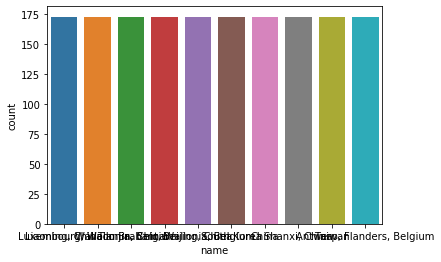

Displaying info for column "level"...


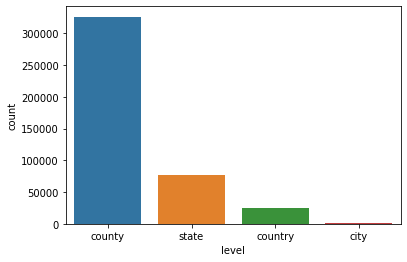

Displaying info for column "city"...


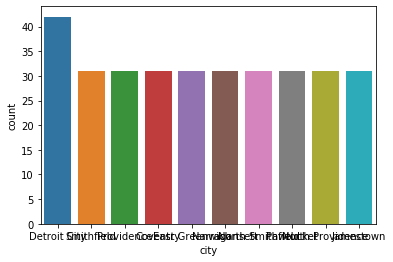

Displaying info for column "county"...


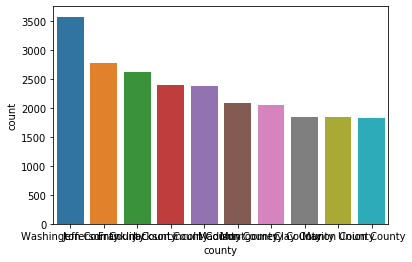

Displaying info for column "state"...


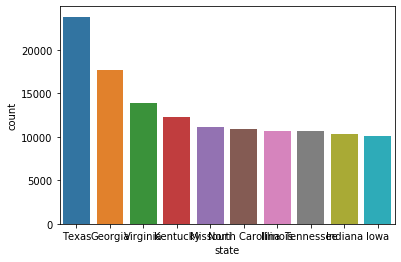

Displaying info for column "country"...


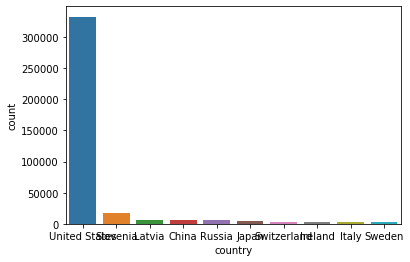

Displaying info for column "population"...


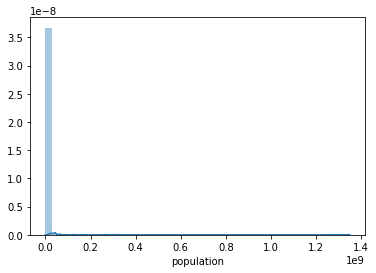

Displaying info for column "lat"...


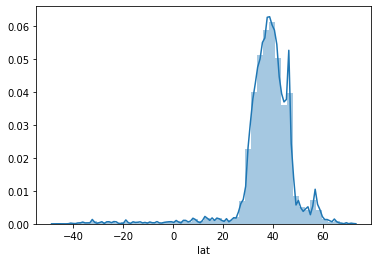

Displaying info for column "long"...


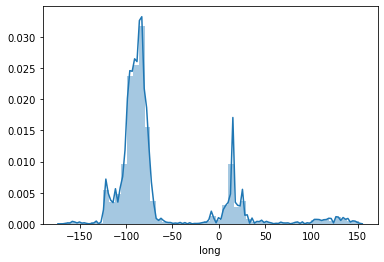

Displaying info for column "url"...


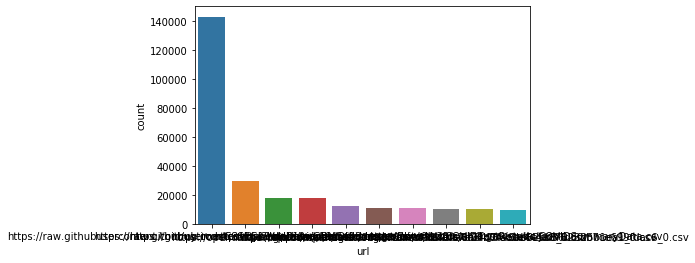

Displaying info for column "aggregate"...


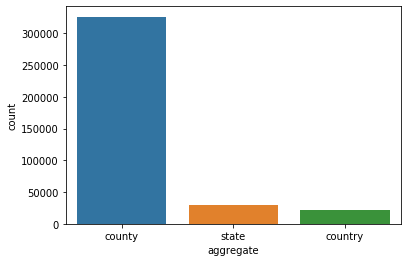

Displaying info for column "tz"...


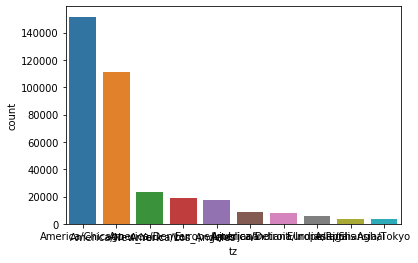

Displaying info for column "cases"...


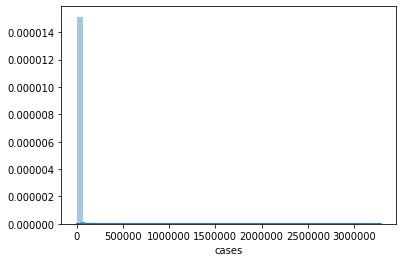

Displaying info for column "deaths"...


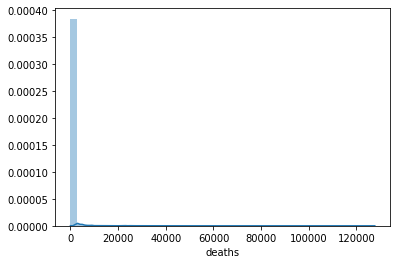

Displaying info for column "recovered"...


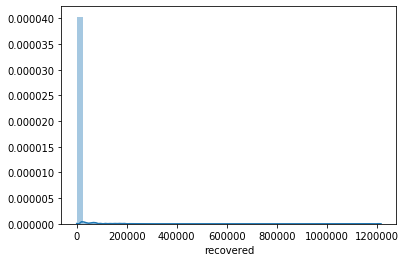

Displaying info for column "active"...


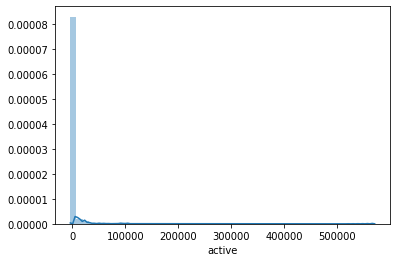

Displaying info for column "tested"...


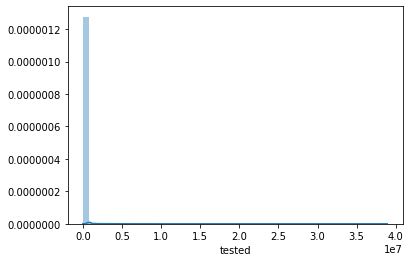

Displaying info for column "hospitalized"...


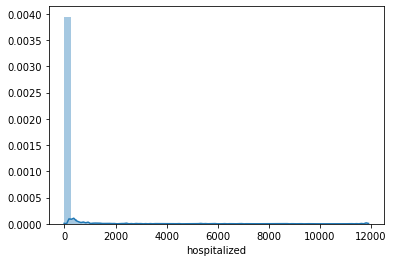

Displaying info for column "hospitalized_current"...


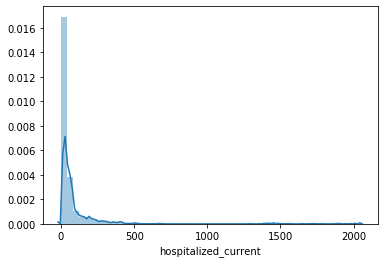

Displaying info for column "discharged"...


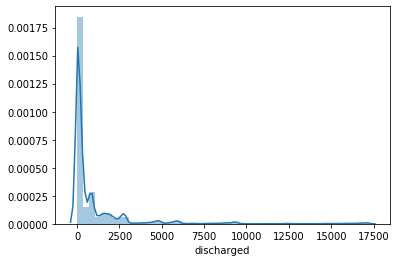

Displaying info for column "icu"...


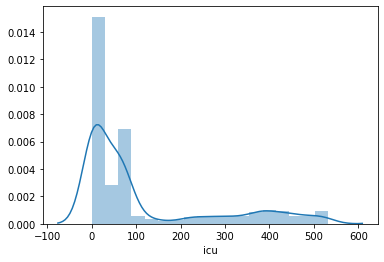

Displaying info for column "icu_current"...


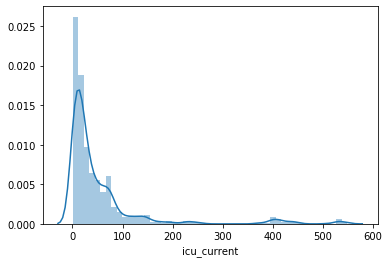

Displaying info for column "growthfactor"...


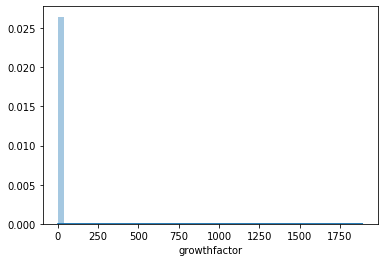

Displaying info for column "date"...


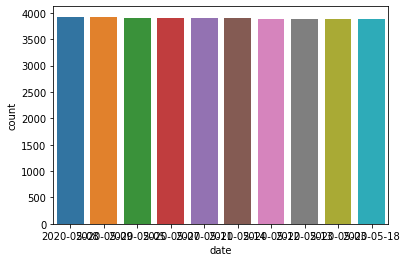

Displaying info for column "last_updated_at"...


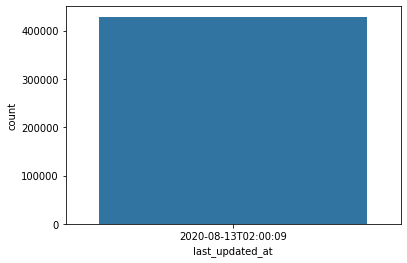

Displaying info for column "state_fips"...


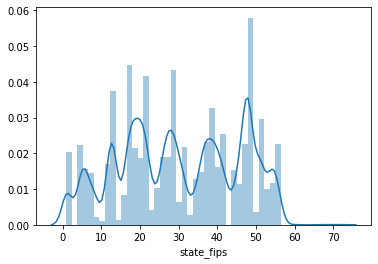

In [18]:
get_data_info_by_columns(covid_df)

In [19]:
print(aapl_mobility_df.columns)

Index(['geo_type', 'region', 'transportation_type', 'alternative_name',
       'sub-region', 'country', '2020-01-13', '2020-01-14', '2020-01-15',
       '2020-01-16',
       ...
       '2020-08-02', '2020-08-03', '2020-08-04', '2020-08-05', '2020-08-06',
       '2020-08-07', '2020-08-08', '2020-08-09', '2020-08-10', '2020-08-11'],
      dtype='object', length=218)


Displaying info for column "geo_type"...


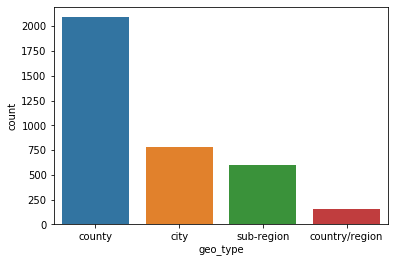

Displaying info for column "region"...


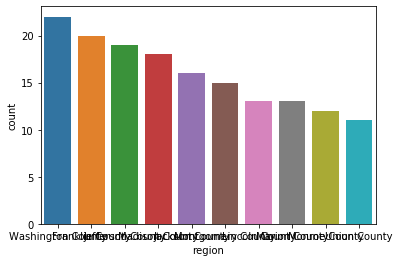

Displaying info for column "transportation_type"...


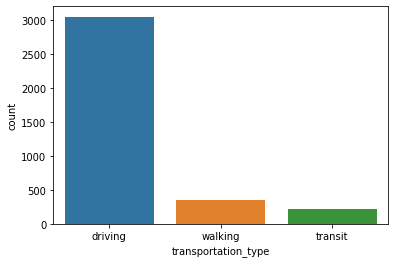

Displaying info for column "alternative_name"...


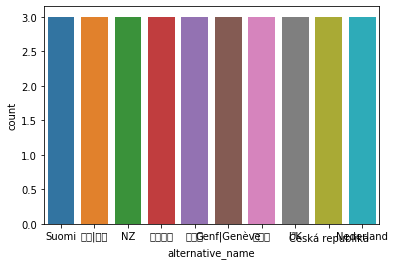

Displaying info for column "sub-region"...


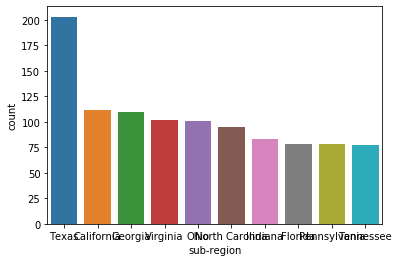

Displaying info for column "country"...


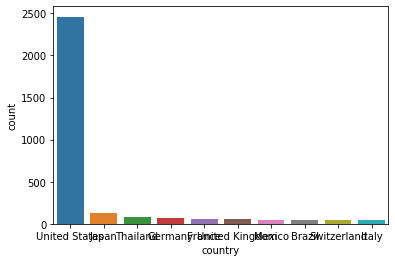

Displaying info for column "2020-01-13"...


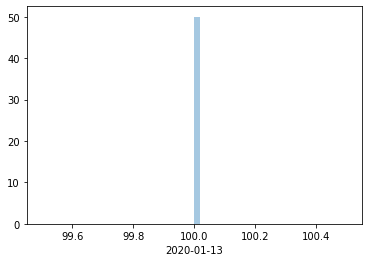

Displaying info for column "2020-01-14"...


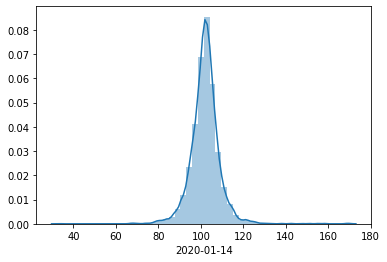

Displaying info for column "2020-01-15"...


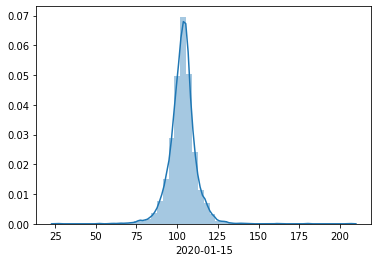

Displaying info for column "2020-07-23"...


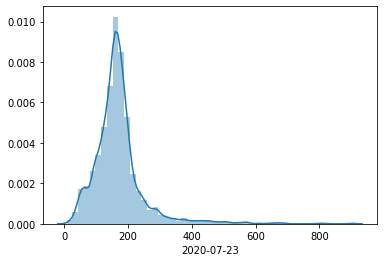

Displaying info for column "2020-07-24"...


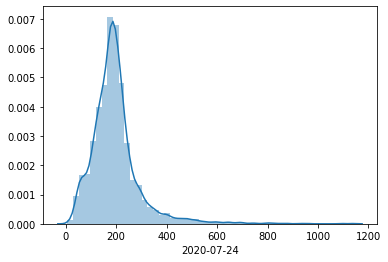

Displaying info for column "2020-07-25"...


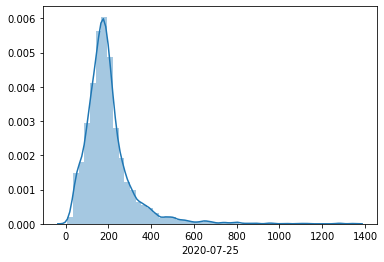

In [20]:
get_data_info_by_columns(aapl_mobility_df, cols=['geo_type', 'region', 'transportation_type', 'alternative_name', 'sub-region', 
                                            'country', '2020-01-13', '2020-01-14', '2020-01-15', '2020-07-23', '2020-07-24', '2020-07-25'])

Displaying info for column "country_region_code"...


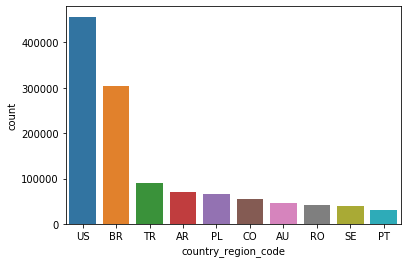

Displaying info for column "country_region"...


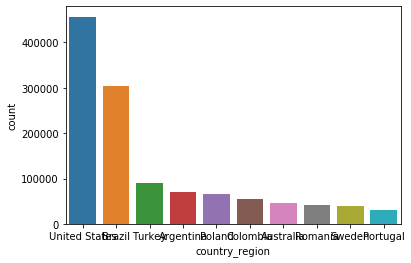

Displaying info for column "sub_region_1"...


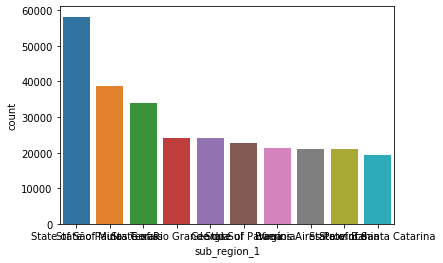

Displaying info for column "sub_region_2"...


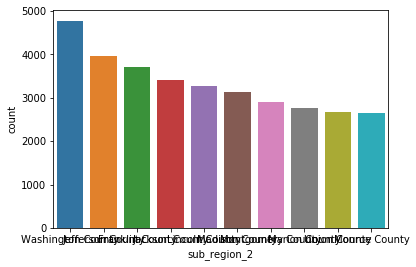

Displaying info for column "metro_area"...


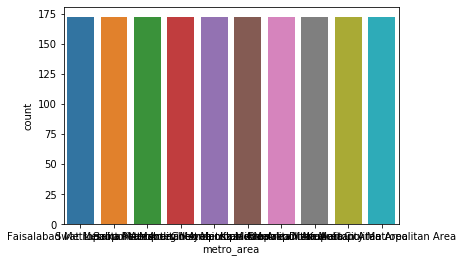

Displaying info for column "iso_3166_2_code"...


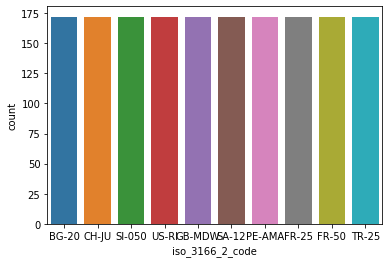

Displaying info for column "census_fips_code"...


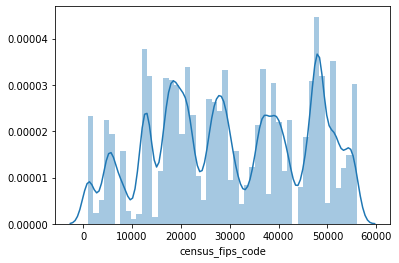

Displaying info for column "date"...


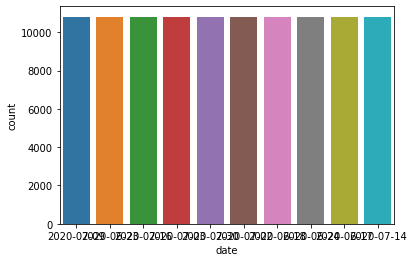

Displaying info for column "retail_and_recreation_percent_change_from_baseline"...


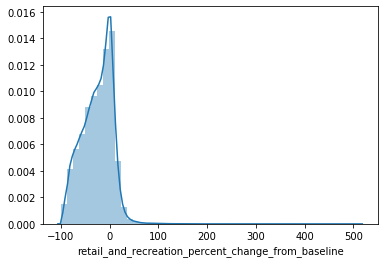

Displaying info for column "grocery_and_pharmacy_percent_change_from_baseline"...


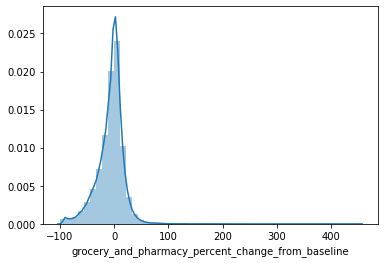

Displaying info for column "parks_percent_change_from_baseline"...


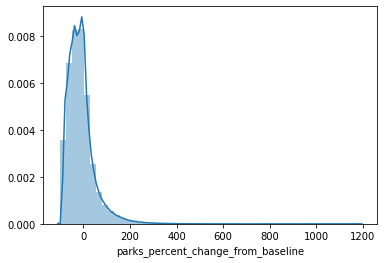

Displaying info for column "transit_stations_percent_change_from_baseline"...


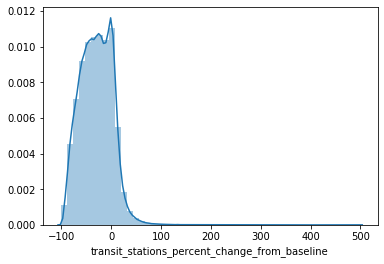

Displaying info for column "workplaces_percent_change_from_baseline"...


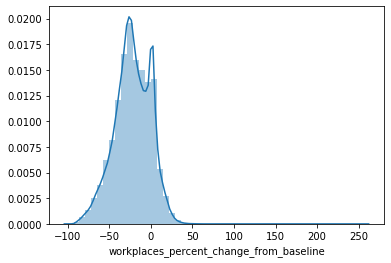

Displaying info for column "residential_percent_change_from_baseline"...


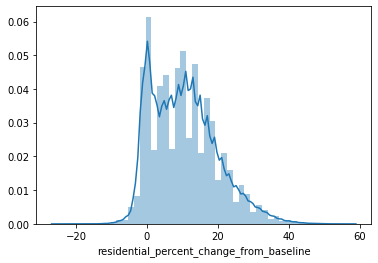

In [17]:
get_data_info_by_columns(goog_mobility_df)

Displaying info for column "Level"...


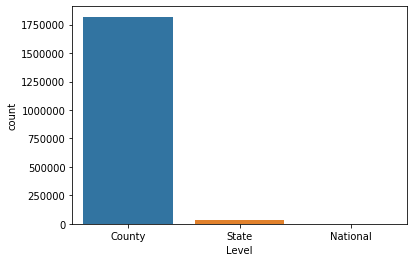

Displaying info for column "Date"...


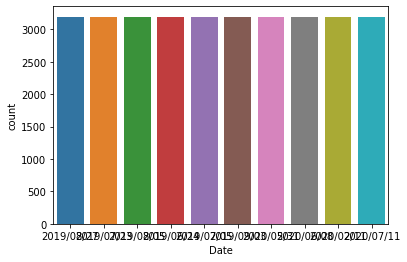

Displaying info for column "State FIPS"...


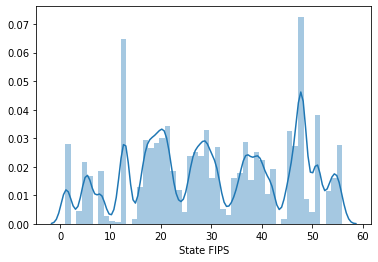

Displaying info for column "State Postal Code"...


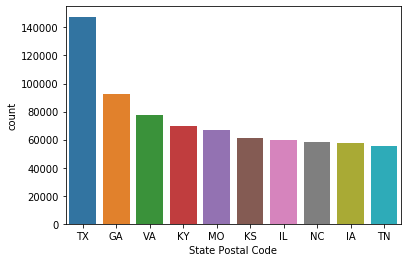

Displaying info for column "County FIPS"...


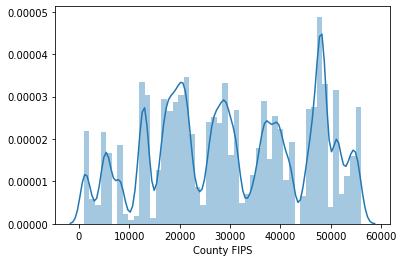

Displaying info for column "County Name"...


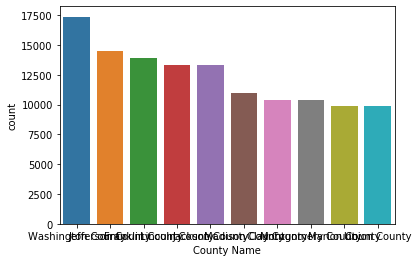

Displaying info for column "Population Staying at Home"...


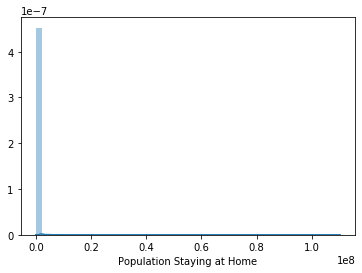

Displaying info for column "Population Not Staying at Home"...


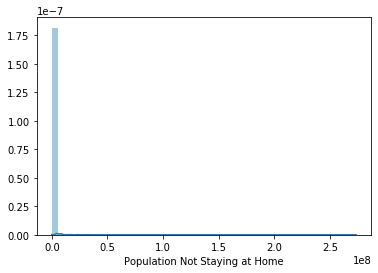

Displaying info for column "Number of Trips"...


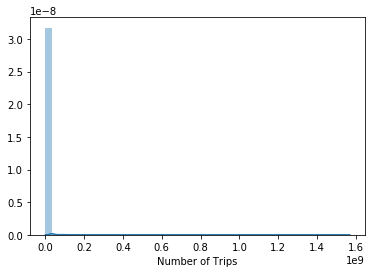

Displaying info for column "Number of Trips <1"...


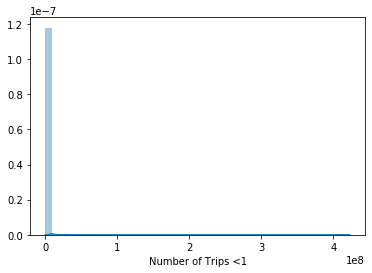

Displaying info for column "Number of Trips 1-3"...


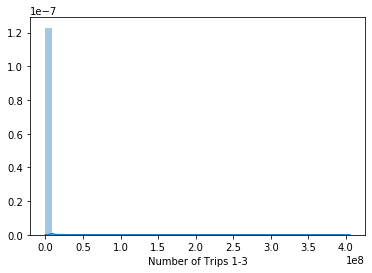

Displaying info for column "Number of Trips 3-5"...


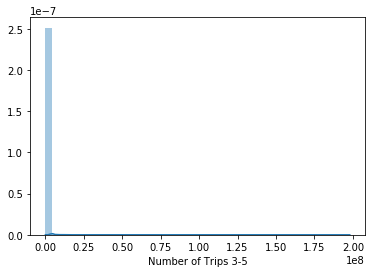

Displaying info for column "Number of Trips 5-10"...


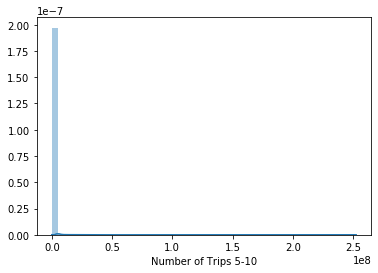

Displaying info for column "Number of Trips 10-25"...


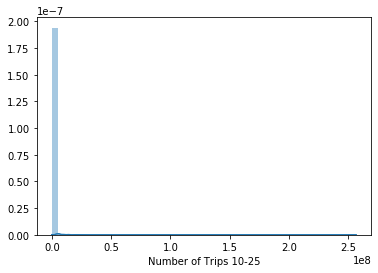

Displaying info for column "Number of Trips 25-50"...


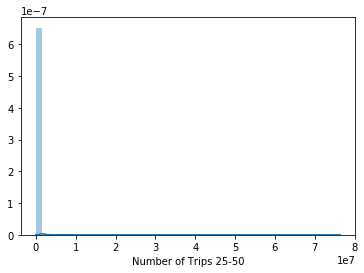

Displaying info for column "Number of Trips 50-100"...


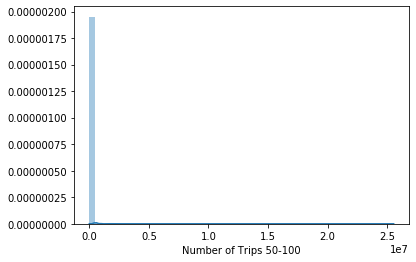

Displaying info for column "Number of Trips 100-250"...


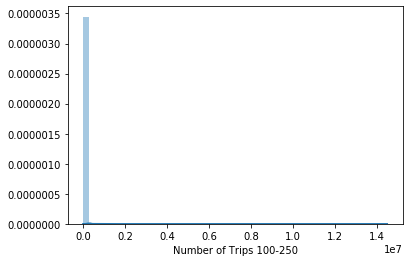

Displaying info for column "Number of Trips 250-500"...


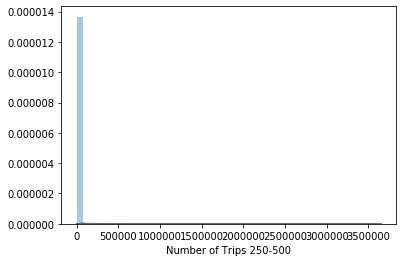

Displaying info for column "Number of Trips >=500"...


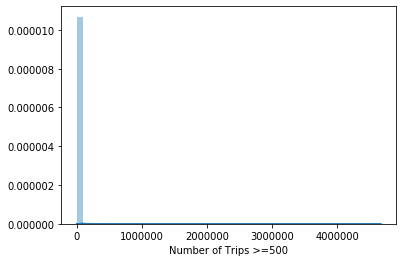

Displaying info for column "state_abbreviation"...


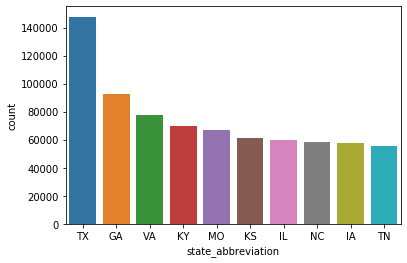

Displaying info for column "state"...


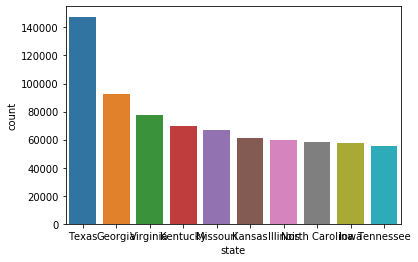

Displaying info for column "status"...


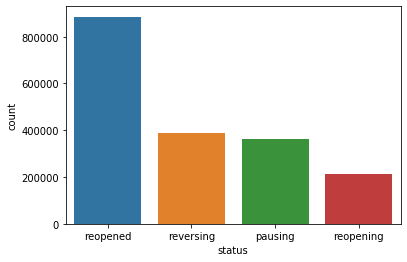

Displaying info for column "date_details"...


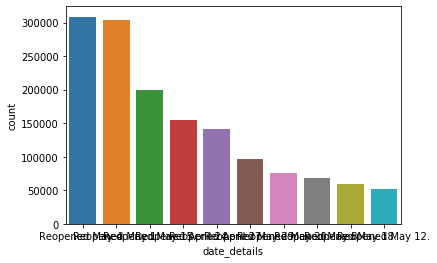

Displaying info for column "restriction_start"...


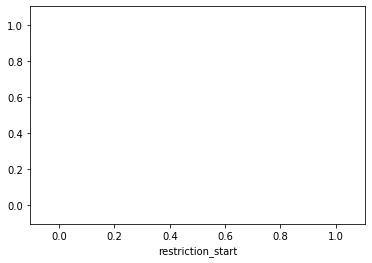

Displaying info for column "restriction_end"...


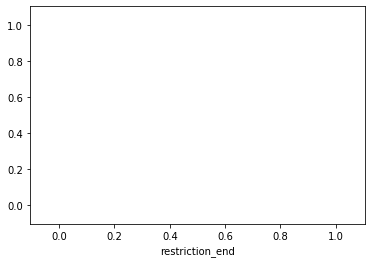

Displaying info for column "status_details"...


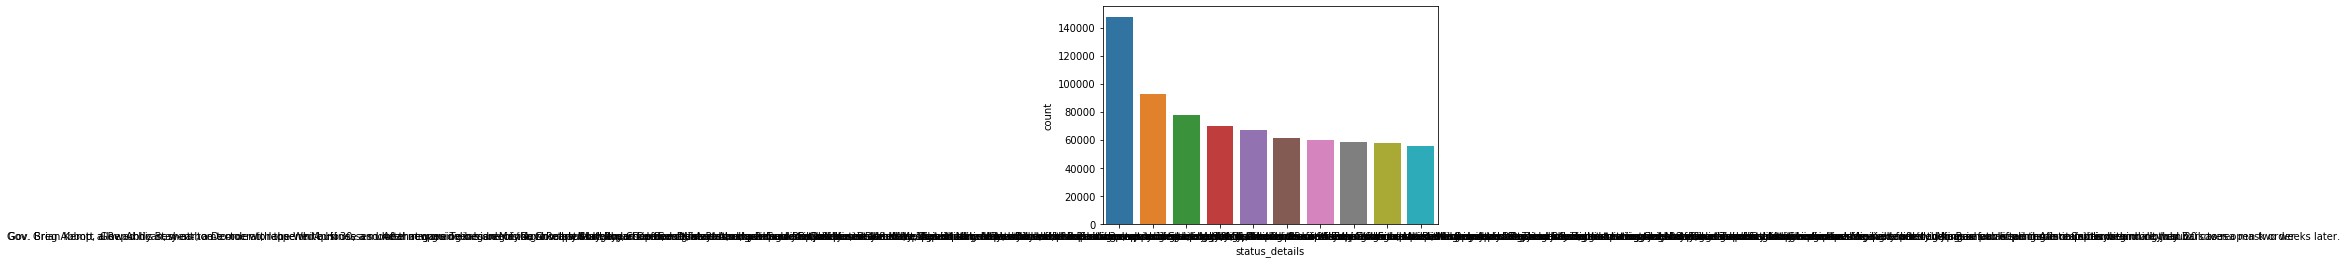

Displaying info for column "external_link"...


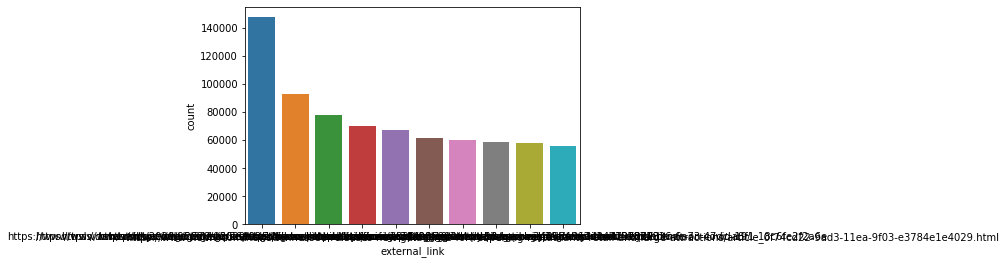

Displaying info for column "opened_industries"...


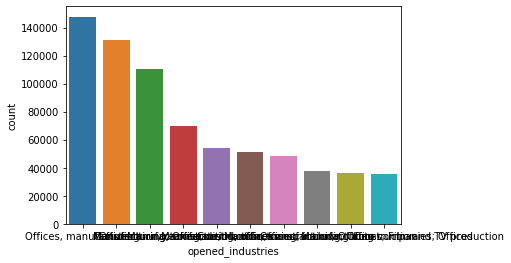

Displaying info for column "opened_outdoor_and_recreation"...


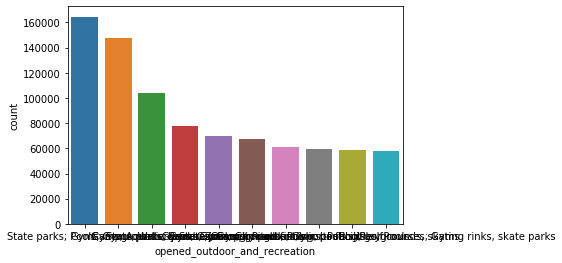

Displaying info for column "opened_houses_of_worship"...


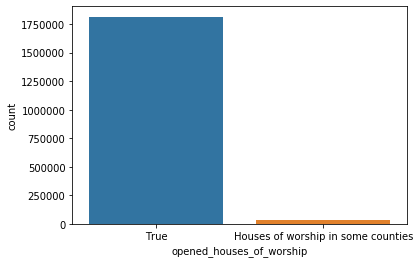

Displaying info for column "closed_outdoor_and_recreation"...


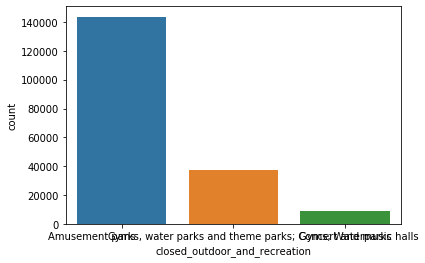

Displaying info for column "opened_food_and_drink"...


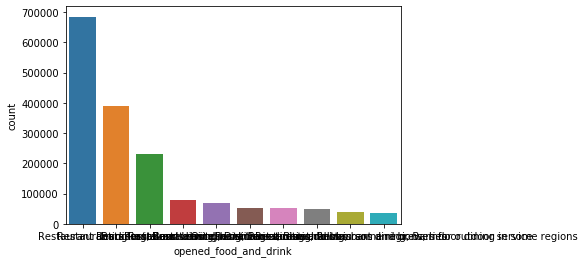

Displaying info for column "opened_retail"...


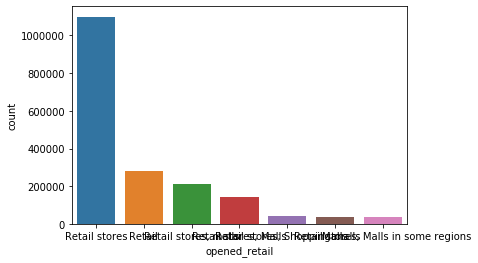

Displaying info for column "closed_food_and_drink"...


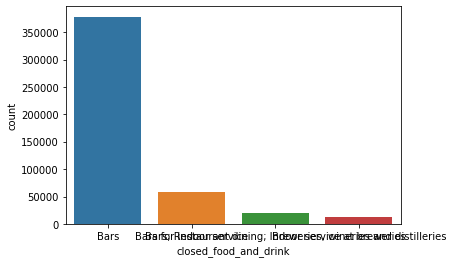

Displaying info for column "opened_personal_care"...


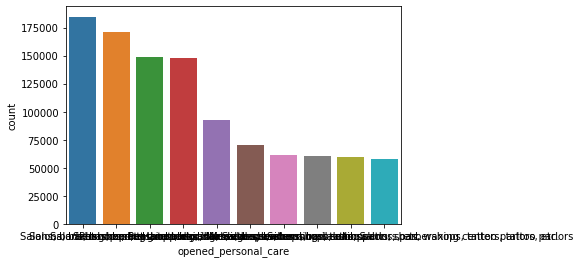

Displaying info for column "closed_entertainment"...


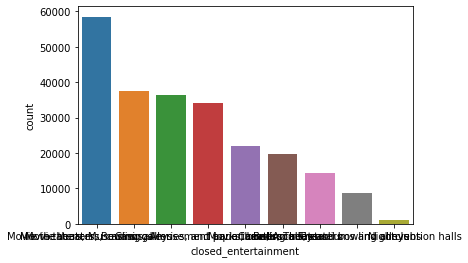

Displaying info for column "opened_entertainment"...


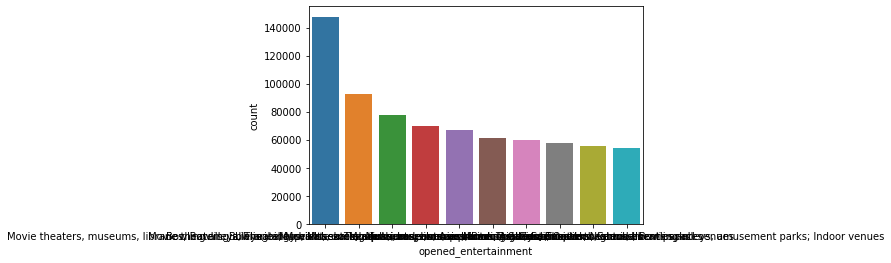

Displaying info for column "population"...


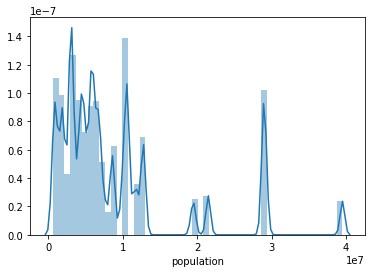

In [21]:
get_data_info_by_columns(bts_mobility_df)

### 02ii. Find State Matches
Due to the sheer number of datasets we are using, it is inevitable that different datasets might spell state names differently. In our study, we are focusing on United States, so we first filter the country information out.<br>
Subsequently, we are going to compare the differences in spelling across all datasets for states.<br>
It is important to ensure consistent spelling for state as we are going to merge all datasets on this column later. Having different spelling means that Python will not be able to merge properly, creating duplicate and null rows at the same time which can be problematic for analysis.

In [22]:
# filter by usa 
usa_covid_df = covid_df[covid_df['country']=='United States']
usa_aapl_df = aapl_mobility_df[aapl_mobility_df['country']=='United States']
usa_goog_df = goog_mobility_df[goog_mobility_df['country_region']=='United States']

In [23]:
def state_checking_function(usa_covid_df, usa_goog_df, usa_aapl_df, bts_mobility_df, rt_df, lockdown_df, weather_df, missing_val = ""):
    # get list of states per dataset
    usa_covid_states = list(set(usa_covid_df['state']))
    usa_goog_states = list(set(usa_goog_df['sub_region_1']))
    usa_aapl_states = list(set(usa_aapl_df['sub-region']))
    bts_df_states = list(set(bts_mobility_df['state']))
    rt_df_states = list(set(rt_df['state']))
    lockdown_df_states = list(set(lockdown_df['State']))
    weather_df_states = list(set(weather_df['state']))

    # get unique list of states across datasets
    list_of_states = list(set(usa_covid_states+usa_goog_states+usa_aapl_states+bts_df_states
                              +rt_df_states+lockdown_df_states+weather_df_states))

    state_checking_df = pd.DataFrame()
    state_checking_df['state_names'] = list_of_states

    for state_list, data_name in zip([usa_covid_states, usa_goog_states, usa_aapl_states, bts_df_states, 
                                      rt_df_states, lockdown_df_states, weather_df_states], 
                                     ['covid_cases', 'google_mob', 'apple_mob', 'bts_mob', 'risk_trans', 'lockdown', 'weather']):
        state_checking_df[data_name]=[missing_val if i in state_list else "Missing" for i in list_of_states]
    
    return state_checking_df

In [21]:
# eye-ball state name discrepancies
state_checking_function(usa_covid_df, usa_goog_df, usa_aapl_df, bts_mobility_df, rt_df, lockdown_df, weather_df)

,state_names,covid_cases,google_mob,apple_mob,bts_mob,risk_trans,lockdown,weather
0,NaN,,,,,Missing,Missing,Missing
1,California,,,,,,,
2,South Dakota,,,,,,Missing,
3,Michigan,,,,,,,
4,North Dakota,,,,,,Missing,
5,Vermont,,,,,,,
6,New Jersey,,,,,,,
7,United States Virgin Islands,,Missing,Missing,Missing,Missing,Missing,Missing
8,Illinois,,,,,,,
9,Florida,,,,,,,


### 02iii. Simple Data Processing

##### based on above investigation, correct State spellings for some datasets
In the following sub-section, we are using a dictionary to find and replace "mispelled" state terms. We are taking rt_df as the baseline state spelling and comparison, as we are eventually going to use rt information as our predictor (y). If rt has missing states, we can't predict on them anyway. Hence, although also undesirable, it does not really affect prediction (It just means we are perhaps excluding on prediction for a certain state completely). <br>
However, if rt has the state whereas other datasets don't, and we merge on them, we will end up having missing X feature variables in our model, affecting model predictions.

In [24]:
# replace following, rest are ignored
find_and_replace_dictionary = {
    'Washington, D.C.': 'District of Columbia',
    'United States Virgin Islands': 'Virgin Islands',
}
usa_covid_df['state'] = usa_covid_df['state'].apply(
    lambda x: find_and_replace_dictionary[x] if x in find_and_replace_dictionary.keys() else x
)
usa_goog_df['sub_region_1'] = usa_goog_df['sub_region_1'].apply(
    lambda x: find_and_replace_dictionary[x] if x in find_and_replace_dictionary.keys() else x
)
usa_aapl_df['sub-region'] = usa_aapl_df['sub-region'].apply(
    lambda x: find_and_replace_dictionary[x] if x in find_and_replace_dictionary.keys() else x
)

# check if improved (rt will be baseline to get states from)
# eye-ball state name discrepancies
state_checking_df = state_checking_function(usa_covid_df, usa_goog_df, usa_aapl_df, bts_mobility_df, rt_df, lockdown_df, weather_df, missing_val=np.nan)
state_checking_df[state_checking_df['risk_trans']!='Missing'].dropna(how='all', subset=[i for i in state_checking_df if i!='state_names'])

,state_names,covid_cases,google_mob,apple_mob,bts_mob,risk_trans,lockdown,weather
12,South Dakota,NaN,NaN,NaN,NaN,NaN,Missing,NaN
19,Nebraska,NaN,NaN,NaN,NaN,NaN,Missing,NaN
26,Iowa,NaN,NaN,NaN,NaN,NaN,Missing,NaN
31,District of Columbia,NaN,NaN,Missing,NaN,NaN,NaN,NaN
33,Arkansas,NaN,NaN,NaN,NaN,NaN,Missing,NaN
43,North Dakota,NaN,NaN,NaN,NaN,NaN,Missing,NaN


##### further clean codes to ensure each row represents a unique State x Date
Some of our datasets are at county level, or have various levels past the State level that we need. We need to condense the information into State x Date level. We shall refer to State x Date as the index of our merged dataset.<br>
Ultimately, we want each merged row to represent a State for each Date. We don't want >1 row representing this information in any dataset prior to merge, as this will be problematic to clean later once we merge and the rows duplicate further.

In [25]:
index_cols = ['date','state']
def check_if_unique_index(data, index_col = index_cols):
    print(len(data.drop_duplicates(subset=index_col))==len(data))

In [26]:
# covid_cases dataset
factor_columns = ['population', 'lat', 'long', 'cases', 'deaths', 'recovered', 'active', 'tested', 'hospitalized', 'discharged', 'icu']
usa_covid_state_df = usa_covid_df[usa_covid_df['level']=='state'].reset_index()
usa_covid_state_df = usa_covid_state_df[['state', 'date']+factor_columns].drop_duplicates()
check_if_unique_index(usa_covid_state_df, index_col = index_cols)

True


In [27]:
# google review
# see the following to show "iso_3166_2_code" represents statelevel
# usa_goog_df[(usa_goog_df['sub_region_1']=='Alabama') & (usa_goog_df['date']=='2020-02-15')]
usa_goog_df_test = usa_goog_df.dropna(subset=['iso_3166_2_code'])
usa_goog_df_test[usa_goog_df_test.duplicated(subset=['date','sub_region_1'])]

,country_region_code,country_region,sub_region_1,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline


In [28]:
# google mobility dataset
usa_goog_state_df = usa_goog_df.dropna(subset=['iso_3166_2_code'])
usa_goog_state_df = usa_goog_state_df.drop(columns=['iso_3166_2_code','census_fips_code', 'sub_region_2', 'metro_area', 'country_region_code'])
check_if_unique_index(usa_goog_state_df, index_col = ['date','sub_region_1'])
usa_goog_state_df.head()

True


,country_region,sub_region_1,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
1172251,United States,Alabama,2020-02-15,5.0,2.0,39.0,7.0,2.0,-1.0
1172252,United States,Alabama,2020-02-16,0.0,-2.0,-7.0,3.0,-1.0,1.0
1172253,United States,Alabama,2020-02-17,3.0,0.0,17.0,7.0,-17.0,4.0
1172254,United States,Alabama,2020-02-18,-4.0,-3.0,-11.0,-1.0,1.0,2.0
1172255,United States,Alabama,2020-02-19,4.0,1.0,6.0,4.0,1.0,0.0


In [29]:
# apple mobility dataset
group_cols = ['geo_type', 'transportation_type', 'sub-region']
usa_aapl_df_grouped = usa_aapl_df.groupby(group_cols).apply(lambda g: g.mean(skipna=False)).reset_index().rename(
    columns={'level_3': 'date', 0: 'mobility'}).dropna(subset=['mobility']).reset_index(drop=True)
unstack_cols = ['geo_type', 'transportation_type']
usa_aapl_state_df = usa_aapl_df_grouped.set_index(unstack_cols+['date','sub-region']).unstack(unstack_cols).reset_index()
usa_aapl_state_df.columns = usa_aapl_state_df.columns.map('_'.join).str.strip('_')
check_if_unique_index(usa_aapl_state_df, index_col = ['date','sub-region'])
usa_aapl_state_df.head()

True


,date,sub-region,mobility_city_driving,mobility_city_transit,mobility_city_walking,mobility_county_driving
0,2020-01-13,Alabama,100.0,100.0,100.0,100.0
1,2020-01-13,Alaska,100.0,NaN,100.0,100.0
2,2020-01-13,Arizona,100.0,100.0,100.0,100.0
3,2020-01-13,Arkansas,NaN,NaN,NaN,100.0
4,2020-01-13,California,100.0,100.0,100.0,100.0


In [30]:
# bts mobility dataset
usa_bts_state_df = bts_mobility_df[bts_mobility_df['Level']=='State']
check_if_unique_index(usa_bts_state_df, index_col = ['Date','state'])

True


In [31]:
# remaining datasets
check_if_unique_index(rt_df, index_col = index_cols)
check_if_unique_index(lockdown_df, index_col = ['Date','State'])
check_if_unique_index(weather_df, index_col = index_cols)

True
False
True


In [32]:
# lockdown dataset (remove county level, take most common)
# usa_lockdown_state_df = lockdown_df.groupby(['Country','State','Date'])['Type'].agg(lambda x:x.value_counts().index[0]).reset_index()
usa_lockdown_state_df = lockdown_df[lockdown_df['County'].isna()].drop(columns=['County'])
check_if_unique_index(usa_lockdown_state_df, index_col = ['Date','State'])
usa_lockdown_state_df.head()

True


,Country,State,Date,Type
0,United States,Alabama,2020-04-04,Stay at home
2,United States,Alaska,2020-03-28,Stay at home
3,United States,Arizona,2020-03-31,Stay at home
4,United States,California,2020-03-19,Stay at home
5,United States,Colorado,2020-03-26,Stay at home


##### final check on unique index

In [33]:
# FINAL DATASETS (SHOULD ALL PRINT TRUE!)
check_if_unique_index(usa_covid_state_df, index_col = index_cols)
check_if_unique_index(usa_goog_state_df, index_col = ['date','sub_region_1'])
check_if_unique_index(usa_aapl_state_df, index_col = ['date','sub-region'])
check_if_unique_index(usa_bts_state_df, index_col = ['Date','state'])
check_if_unique_index(rt_df, index_col = index_cols)
check_if_unique_index(usa_lockdown_state_df, index_col = ['Date','State'])
check_if_unique_index(weather_df, index_col = index_cols)

True
True
True
True
True
True
True


### 02iv. Merging Data
Now that we are confident that the index is unique per dataset, we can do formatting for date column and merge on the index_cols per data.

In [34]:
# format all date columns into right date type
rt_df['date'] = pd.to_datetime(rt_df['date'])
usa_covid_state_df['date'] = pd.to_datetime(usa_covid_state_df['date'])
usa_goog_state_df['date'] = pd.to_datetime(usa_goog_state_df['date'])
usa_aapl_state_df['date'] = pd.to_datetime(usa_aapl_state_df['date'])
usa_bts_state_df['Date'] = pd.to_datetime(usa_bts_state_df['Date'])
usa_lockdown_state_df['Date'] = pd.to_datetime(usa_lockdown_state_df['Date'])

In [35]:
# note we only want to analyse states available in RT data
usa_merged_data = rt_df.merge(usa_covid_state_df,
    how = 'left', on = index_cols
)
usa_merged_data = usa_merged_data.merge(usa_goog_state_df,
    how = 'left', left_on = index_cols, right_on = ['date','sub_region_1']
)
usa_merged_data = usa_merged_data.merge(usa_aapl_state_df,
    how = 'left', left_on = index_cols, right_on = ['date','sub-region']
)
usa_merged_data = usa_merged_data.merge(usa_bts_state_df,
    how = 'left', left_on = index_cols, right_on = ['Date','state']
)
usa_merged_data = usa_merged_data.merge(usa_lockdown_state_df,
    how = 'left', left_on = index_cols, right_on = ['Date','State']
)
usa_merged_data = usa_merged_data.merge(weather_df,
    how = 'left', on = index_cols
)
usa_merged_data = usa_merged_data.drop(columns=['Country', 'Date_x', 'Date_y', 'index', 'State', 'sub_region_1', 'sub-region'])

One dataset that might be tricky is the lockdown dataset. It represents each date that the state makes some official changes (E.g. Lockdown, reopen, stay-home notice, etc.). Intuitively, if the state officially announces Lockdown on 03 April 2020 and then announces reopening in 03 May 2020, we can forward fill the lockdown status between 04 April to 02 May to also be 'Lockdown'.<br>
This is exactly what we do here, making sure to forward fill (ffill) by grouping each state up.

In [36]:
# impute 'Type' into date period
usa_merged_data = usa_merged_data.sort_values(by=index_cols, ascending=True)
usa_merged_data['lockdown_status'] = usa_merged_data.groupby('state')['Type'].transform(lambda v: v.ffill())
usa_merged_data

,date,region,mean,median,lower_80,upper_80,infections,test_adjusted_positive,test_adjusted_positive_raw,positive,...,closed_food_and_drink_y,opened_personal_care_y,closed_entertainment_y,opened_entertainment_y,population,Type,Unnamed: 0,temperature_median_degC,wind_speed_median_m/s,lockdown_status
7483,2020-01-19,WA,1.924016,1.895412,1.549802,2.236047,5.512289,0.000000,0.000000,0.0,...,NaN,"Gyms in most counties; Hair salons, barbershop...",NaN,Casinos,7614893.0,NaN,18.0,-0.805,0.755,NaN
7484,2020-01-20,WA,1.924620,1.900047,1.631023,2.278532,0.074463,0.000000,0.000000,0.0,...,NaN,"Gyms in most counties; Hair salons, barbershop...",NaN,Casinos,7614893.0,NaN,19.0,0.440,0.740,NaN
7485,2020-01-21,WA,1.926510,1.909159,1.605030,2.238290,1.055981,0.000000,0.000000,0.0,...,NaN,"Gyms in most counties; Hair salons, barbershop...",NaN,Casinos,7614893.0,NaN,20.0,0.420,1.120,NaN
7486,2020-01-22,WA,1.928528,1.913118,1.613685,2.219701,2.011139,0.000000,0.000000,0.0,...,NaN,"Gyms in most counties; Hair salons, barbershop...",NaN,Casinos,7614893.0,NaN,21.0,-0.640,1.025,NaN
7487,2020-01-23,WA,1.937532,1.917427,1.629924,2.231084,2.229723,0.000000,0.000000,0.0,...,NaN,"Gyms in most counties; Hair salons, barbershop...",NaN,Casinos,7614893.0,NaN,22.0,1.130,0.480,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2002,2020-08-11,VA,1.069485,1.055423,0.850449,1.300437,733.293216,657.866187,818.835139,996.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Stay at home
7688,2020-08-11,WA,1.091509,1.074152,0.837074,1.370896,546.296098,441.799045,0.000000,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Stay at home
3169,2020-08-11,WV,0.911295,0.904299,0.706419,1.097959,49.749680,65.166484,81.260060,121.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Stay at home
4339,2020-08-11,WI,0.966151,0.960694,0.747007,1.143353,369.019989,416.073181,361.967341,767.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Stay at home


In [37]:
# review jarring missing info that might need to be cleaned/excluded
usa_merged_data.isna().sum()

date                          0
region                        0
mean                          0
median                        0
lower_80                      0
                           ... 
Type                       8475
Unnamed: 0                  204
temperature_median_degC     204
wind_speed_median_m/s       204
lockdown_status            2616
Length: 96, dtype: int64

### 02v. Visualise Time Plots
Now that we have merged and lightly cleaned the datasets, we can do some quick plots overtime to observe any variable of interest. Some examples are shown below, where state represents the color of each line, legend removed as it is too cluttered.

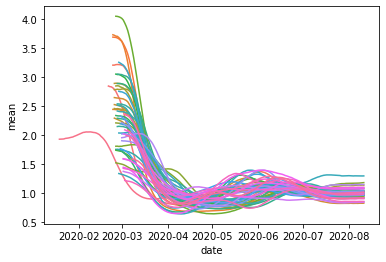

In [38]:
# plot some interesting graphs to visualise
ax = sns.lineplot(x="date", y="mean", hue="state", data=usa_merged_data, legend=False)

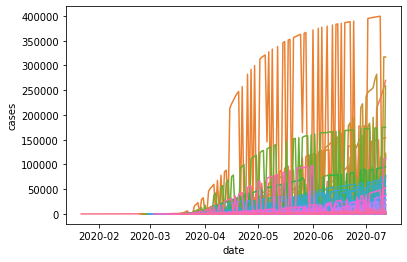

In [39]:
ax = sns.lineplot(x="date", y="cases", hue="state", data=usa_merged_data, legend=False)

### 02vi. Export Data
We save the merged dataset so that in the future, we can jump to the next Section 03 without having to rerun our codes from Section 01 and 02.

In [40]:
# export pre-processed data 
# convert dataframe to csv and save to notebook instance
usa_merged_data.to_csv('usa_merged_data.csv', index=False)

In [41]:
# load csv file to S3
import os

output_bucket = 'ml-social-good'
prefix = 'covid19-hackathon/data'

boto3.resource('s3').Bucket(output_bucket).Object(os.path.join(prefix, 'usa_merged_data.csv')).upload_file('usa_merged_data.csv')

## 03. Feature Engineering

### 03i. Load Data
Run this section if you are skipping Sections 01 & 02, with pre-saved merged data, else, skip to next sub-section 03ii.

In [42]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# if running locally
# usa_merged_data = pd.read_csv('data/usa_merged_data.csv')

# if running in SageMaker, load csv from S3
data_key = 'covid19-hackathon/data/usa_merged_data.csv'
usa_merged_data = load_data_from_s3(bucket, data_key)

In [43]:
# review current available columns
print(usa_merged_data.columns)

Index(['date', 'region', 'mean', 'median', 'lower_80', 'upper_80',
       'infections', 'test_adjusted_positive', 'test_adjusted_positive_raw',
       'positive', 'tests', 'new_tests', 'new_cases', 'new_deaths',
       'state_abbreviation_x', 'state', 'status_x', 'date_details_x',
       'restriction_start_x', 'restriction_end_x', 'status_details_x',
       'external_link_x', 'opened_industries_x',
       'opened_outdoor_and_recreation_x', 'opened_houses_of_worship_x',
       'closed_outdoor_and_recreation_x', 'opened_food_and_drink_x',
       'opened_retail_x', 'closed_food_and_drink_x', 'opened_personal_care_x',
       'closed_entertainment_x', 'opened_entertainment_x', 'population_x',
       'population_y', 'lat', 'long', 'cases', 'deaths', 'recovered', 'active',
       'tested', 'hospitalized', 'discharged', 'icu', 'country_region',
       'retail_and_recreation_percent_change_from_baseline',
       'grocery_and_pharmacy_percent_change_from_baseline',
       'parks_percent_change_f

### 03ii. Create Time Labels
We get that time features are important in predicting 'mean of Risk of Transmission' based on Section 02v. Yet including 'date' as a variable into the model seems too specific and granular. We try to create some representations of 'date' by generating month, week and day of week features.

In [44]:
usa_merged_data['date'] = pd.to_datetime(usa_merged_data['date'])
usa_merged_data['month'] = usa_merged_data['date'].apply(lambda x: x.month)
usa_merged_data['week'] = usa_merged_data['date'].apply(lambda x: x.week)
usa_merged_data['weekday'] = usa_merged_data['date'].apply(lambda x: x.weekday())

### 03iii. Clean Missing Variables
In this case, we decided to group by states and sort the values by the date (ascending order). Then, we could fill the missing values of previous valid observation in the event it is missing.

In [45]:
# mean smoothing of variable (e.g. ignore missings/ zeros by filling from last reported qty)

usa_merged_data = (usa_merged_data.groupby('state')
                   .apply(lambda x: x.sort_values('date', ascending=True))
                   .reset_index(drop=True))

def ffill_missing_values_groupby_state(column: str):
    usa_merged_data[column] = usa_merged_data.groupby('state')[column].transform(lambda v: v.ffill())
    
def bfill_missing_values_groupby_state(column: str):
    usa_merged_data[column] = usa_merged_data.groupby('state')[column].transform(lambda v: v.bfill())

In [46]:
index_cols = ['date', 'state']

target_vars_to_lag = [ 'mean', 'median', 'lower_80', 'upper_80', 'infections', 'test_adjusted_positive',
                      'test_adjusted_positive_raw', 'positive', 'tests', 'new_tests',
                      'new_cases', 'new_deaths', 'cases', 'deaths', 'recovered', 'active', 'tested']
mobility_vars_to_lag = ['retail_and_recreation_percent_change_from_baseline',
                        'grocery_and_pharmacy_percent_change_from_baseline',
                        'parks_percent_change_from_baseline',
                        'transit_stations_percent_change_from_baseline',
                        'workplaces_percent_change_from_baseline',
                        'residential_percent_change_from_baseline', 'mobility_city_driving',
                        'mobility_city_transit', 'mobility_city_walking',
                        'mobility_county_driving', 'Population Staying at Home', 'Population Not Staying at Home',
                        'Number of Trips', 'Number of Trips <1', 'Number of Trips 1-3',
                        'Number of Trips 3-5', 'Number of Trips 5-10', 'Number of Trips 10-25',
                        'Number of Trips 25-50', 'Number of Trips 50-100',
                        'Number of Trips 100-250', 'Number of Trips 250-500', 'Number of Trips >=500', 
                        # add season information if applicable here
                        'temperature_median_degC', 'wind_speed_median_m/s']

In [47]:
for var in target_vars_to_lag+mobility_vars_to_lag:
    ffill_missing_values_groupby_state(var)

### 03iv. Create Lagged Variables

In [48]:
usa_merged_data = usa_merged_data.sort_values(by=index_cols, ascending=True)

for var in target_vars_to_lag:
    for lag_num in range(1,15):
        usa_merged_data[var+'_lag_'+str(lag_num)] = usa_merged_data.sort_values('date').groupby(['state'])[var].shift(lag_num)

for var in mobility_vars_to_lag:
    for lag_num in range(7,22):
        usa_merged_data[var+'_lag_'+str(lag_num)] = usa_merged_data.sort_values('date').groupby(['state'])[var].shift(lag_num)

In [49]:
print(list(usa_merged_data.columns))

['date', 'region', 'mean', 'median', 'lower_80', 'upper_80', 'infections', 'test_adjusted_positive', 'test_adjusted_positive_raw', 'positive', 'tests', 'new_tests', 'new_cases', 'new_deaths', 'state_abbreviation_x', 'state', 'status_x', 'date_details_x', 'restriction_start_x', 'restriction_end_x', 'status_details_x', 'external_link_x', 'opened_industries_x', 'opened_outdoor_and_recreation_x', 'opened_houses_of_worship_x', 'closed_outdoor_and_recreation_x', 'opened_food_and_drink_x', 'opened_retail_x', 'closed_food_and_drink_x', 'opened_personal_care_x', 'closed_entertainment_x', 'opened_entertainment_x', 'population_x', 'population_y', 'lat', 'long', 'cases', 'deaths', 'recovered', 'active', 'tested', 'hospitalized', 'discharged', 'icu', 'country_region', 'retail_and_recreation_percent_change_from_baseline', 'grocery_and_pharmacy_percent_change_from_baseline', 'parks_percent_change_from_baseline', 'transit_stations_percent_change_from_baseline', 'workplaces_percent_change_from_baseline

In [50]:
# create_lagged_averages
for var in target_vars_to_lag:
    usa_merged_data[var+'_lag_past4days'] = usa_merged_data[var+'_lag_1']+usa_merged_data[var+'_lag_2']+usa_merged_data[var+'_lag_3']+usa_merged_data[var+'_lag_4']
    usa_merged_data[var+'_lag_1_past4days'] = usa_merged_data[var+'_lag_2']+usa_merged_data[var+'_lag_3']+usa_merged_data[var+'_lag_4']+usa_merged_data[var+'_lag_5']
    usa_merged_data[var+'_lag_2_past4days'] = usa_merged_data[var+'_lag_3']+usa_merged_data[var+'_lag_4']+usa_merged_data[var+'_lag_5']+usa_merged_data[var+'_lag_6']
    usa_merged_data[var+'_lag_3_past4days'] = usa_merged_data[var+'_lag_4']+usa_merged_data[var+'_lag_5']+usa_merged_data[var+'_lag_6']+usa_merged_data[var+'_lag_7']
    usa_merged_data[var+'_lag_4_past4days'] = usa_merged_data[var+'_lag_5']+usa_merged_data[var+'_lag_6']+usa_merged_data[var+'_lag_7']+usa_merged_data[var+'_lag_8']
    usa_merged_data[var+'_lag_5_past4days'] = usa_merged_data[var+'_lag_6']+usa_merged_data[var+'_lag_7']+usa_merged_data[var+'_lag_8']+usa_merged_data[var+'_lag_9']
    usa_merged_data[var+'_lag_6_past4days'] = usa_merged_data[var+'_lag_7']+usa_merged_data[var+'_lag_8']+usa_merged_data[var+'_lag_9']+usa_merged_data[var+'_lag_10']
    usa_merged_data[var+'_lag_7_past4days'] = usa_merged_data[var+'_lag_8']+usa_merged_data[var+'_lag_9']+usa_merged_data[var+'_lag_10']+usa_merged_data[var+'_lag_7']
    
    usa_merged_data[var+'_lag_pastweek'] = usa_merged_data[var+'_lag_past4days'] + usa_merged_data[var+'_lag_5']+usa_merged_data[var+'_lag_6']+usa_merged_data[var+'_lag_7']
    usa_merged_data[var+'_lag_lastweek'] = usa_merged_data[var+'_lag_8']+usa_merged_data[var+'_lag_9']+usa_merged_data[var+'_lag_10']+usa_merged_data[var+'_lag_11']+usa_merged_data[var+'_lag_12']+usa_merged_data[var+'_lag_13']+usa_merged_data[var+'_lag_14']
    
    usa_merged_data[var+'_lag_past4days'] /= 4
    usa_merged_data[var+'_lag_1_past4days'] /=4
    usa_merged_data[var+'_lag_2_past4days'] /=4
    usa_merged_data[var+'_lag_3_past4days'] /=4
    usa_merged_data[var+'_lag_4_past4days'] /=4
    usa_merged_data[var+'_lag_5_past4days'] /=4
    usa_merged_data[var+'_lag_6_past4days'] /=4
    usa_merged_data[var+'_lag_7_past4days'] /=4
    
    usa_merged_data[var+'_lag_pastweek'] /= 7
    usa_merged_data[var+'_lag_lastweek'] /= 7
    
for var in mobility_vars_to_lag:
    usa_merged_data[var+'_lag_lastweek'] = usa_merged_data[var+'_lag_8']+usa_merged_data[var+'_lag_9']+usa_merged_data[var+'_lag_10']+usa_merged_data[var+'_lag_11']+usa_merged_data[var+'_lag_12']+usa_merged_data[var+'_lag_13']+usa_merged_data[var+'_lag_14']
    usa_merged_data[var+'_lag_lastmidweek'] = usa_merged_data[var+'_lag_11']+usa_merged_data[var+'_lag_12']+usa_merged_data[var+'_lag_13']+usa_merged_data[var+'_lag_14']+usa_merged_data[var+'_lag_15']+usa_merged_data[var+'_lag_16']+usa_merged_data[var+'_lag_17']
    usa_merged_data[var+'_lag_lastlastweek'] = usa_merged_data[var+'_lag_15']+usa_merged_data[var+'_lag_16']+usa_merged_data[var+'_lag_17']+usa_merged_data[var+'_lag_18']+usa_merged_data[var+'_lag_19']+usa_merged_data[var+'_lag_20']+usa_merged_data[var+'_lag_21']
    
    usa_merged_data[var+'_lag_lastweek'] /= 7
    usa_merged_data[var+'_lag_lastmidweek'] /= 7
    usa_merged_data[var+'_lag_lastlastweek'] /= 7

In [49]:
# review created lagged variables that will be included into the model
print([i for i in usa_merged_data.columns if ('_past' in i) or ('lag_last' in i)])

['mean_lag_past4days', 'mean_lag_1_past4days', 'mean_lag_2_past4days', 'mean_lag_3_past4days', 'mean_lag_4_past4days', 'mean_lag_5_past4days', 'mean_lag_6_past4days', 'mean_lag_7_past4days', 'mean_lag_pastweek', 'mean_lag_lastweek', 'median_lag_past4days', 'median_lag_1_past4days', 'median_lag_2_past4days', 'median_lag_3_past4days', 'median_lag_4_past4days', 'median_lag_5_past4days', 'median_lag_6_past4days', 'median_lag_7_past4days', 'median_lag_pastweek', 'median_lag_lastweek', 'lower_80_lag_past4days', 'lower_80_lag_1_past4days', 'lower_80_lag_2_past4days', 'lower_80_lag_3_past4days', 'lower_80_lag_4_past4days', 'lower_80_lag_5_past4days', 'lower_80_lag_6_past4days', 'lower_80_lag_7_past4days', 'lower_80_lag_pastweek', 'lower_80_lag_lastweek', 'upper_80_lag_past4days', 'upper_80_lag_1_past4days', 'upper_80_lag_2_past4days', 'upper_80_lag_3_past4days', 'upper_80_lag_4_past4days', 'upper_80_lag_5_past4days', 'upper_80_lag_6_past4days', 'upper_80_lag_7_past4days', 'upper_80_lag_pastwee

### 03v. Export Data
We save the feature engineered dataset so that in the future, we can jump to the next Section 04 without having to rerun our codes from Section 03.

In [51]:
usa_merged_data.to_csv('usa_merged_data_fe.csv', index=False)

In [52]:
output_bucket = 'ml-social-good'
prefix = 'covid19-hackathon/data'

boto3.resource('s3').Bucket(output_bucket).Object(os.path.join(prefix, 'usa_merged_data_fe.csv')).upload_file('usa_merged_data_fe.csv')

## 04. Modelling

### 04i. Import Packages
We import packages required for modelling.

In [54]:
!pip install lightgbm

     |████████████████████████████████| 1.2 MB 13.2 MB/s eta 0:00:01


In [55]:
import lightgbm as lgb
import seaborn as sns
import datetime 
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

### 04ii. Load Data
Run this section if you are skipping Sections 03, with pre-saved feature engineered data, else, skip to next sub-section 04iii.

In [56]:
# if using in local
# usa_merged_data = pd.read_csv('data/usa_merged_data_fe.csv')

# if running in SageMaker, load csv from S3
data_key = 'covid19-hackathon/data/usa_merged_data_fe.csv'
usa_merged_data = load_data_from_s3(bucket, data_key)

In [57]:
print(usa_merged_data.columns)

Index(['date', 'region', 'mean', 'median', 'lower_80', 'upper_80',
       'infections', 'test_adjusted_positive', 'test_adjusted_positive_raw',
       'positive',
       ...
       'Number of Trips 250-500_lag_lastlastweek',
       'Number of Trips >=500_lag_lastweek',
       'Number of Trips >=500_lag_lastmidweek',
       'Number of Trips >=500_lag_lastlastweek',
       'temperature_median_degC_lag_lastweek',
       'temperature_median_degC_lag_lastmidweek',
       'temperature_median_degC_lag_lastlastweek',
       'wind_speed_median_m/s_lag_lastweek',
       'wind_speed_median_m/s_lag_lastmidweek',
       'wind_speed_median_m/s_lag_lastlastweek'],
      dtype='object', length=957)


### 04iii. Set Model Variables
We set model variables here so that they are easy to change and play around with later.
Note that for lgbm package, we need to format categorical variables astype 'category'.

In [58]:
# Input variables
data = usa_merged_data.copy()
cat_var = ['month', 'week', 'weekday', 'lockdown_status', 'state']
# num_var = [i for i in usa_merged_data.columns if ('lag_past' in i) or ('lag_last' in i)]
# try without past4 info
# 'temperature_median_degC', 'wind_speed_median_m/s'
num_var = [i for i in usa_merged_data.columns if ('lag_past' in i) or ('lag_last' in i)]+['long', 'lat']
# remove the following line if you want to include weather
num_var = [i for i in num_var if ('temperature_' not in i) and ('wind_speed' not in i)]

df_train_columns = cat_var + num_var
for column in cat_var:
    data[column] =  data[column].astype('category')
    
# Outcome variables
target_var = 'mean'

# Define Date Columns
date_variable = 'date'
data[date_variable] = pd.to_datetime(data[date_variable])

### 04iv. Quick Visualisations

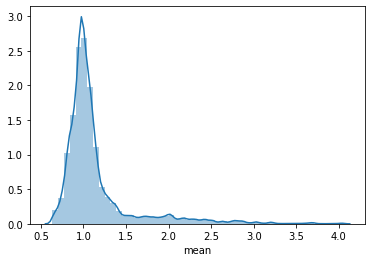

In [59]:
# to review if target_var is too skewed and might be problematic
sns.distplot(data[target_var])

Text(0.5, 1.0, 'Date distribution')

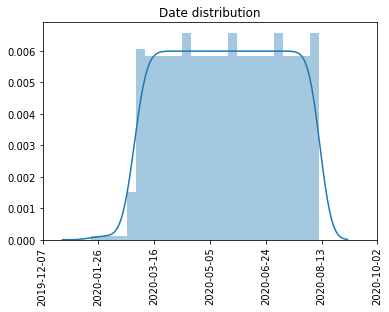

In [60]:
# code solution: https://github.com/mwaskom/seaborn/issues/1059
ordinal_dates = np.array([d.toordinal() for d in data[date_variable]])
sns.distplot(ordinal_dates, kde=True)
ticks_locations, _ = plt.xticks()
labels = [datetime.datetime.fromordinal(int(t)).date() for t in ticks_locations]
plt.xticks(ticks_locations, labels, rotation=90)
plt.title("Date distribution")

### 04v. Train-Test-Val-Split
By reviewing the date distribution plot above, we get a sense of how much data we have roughly, and where we can split our train-test-val by. Instead of random splits, we are choosing to split by time as in the real world, we are going to be using past information to predict the future.<br>
We want to replicate this ordinal format of forecasting, so that we don't end up overfitting on specific dates that can be 'seen' from using a random split.

In [61]:
# Model Parameters
validate_from = '2020-06-01' 
train_till = '2020-07-01'

# Train Test Split
data[date_variable] = pd.to_datetime(data[date_variable])

main_data = data[data[date_variable] < pd.to_datetime(train_till)].copy()
test = data[data[date_variable] >= pd.to_datetime(train_till)].copy()

train = main_data[main_data[date_variable] < pd.to_datetime(validate_from)].copy()
val = main_data[main_data[date_variable] >= pd.to_datetime(validate_from)].copy()

# Format data for Model
X_train = train[df_train_columns]
y_train = train[target_var]

X_val = val[df_train_columns]
y_val = val[target_var]

# Ensure sufficient data per set
print(len(train))
print(len(val))
print(len(test))

4846
1530
2142


### 04vi. Train Model
With lgb module, training of the model is straightforward by formatting the data into lgbm data containers, then running the lgb.train function. Here, we are using some default model parameters, although in the future we intend to use cross-validation to perform hyperparameter tuning.<br>
Nevertheless, our current model performs well enough, and hence this was de-prioritised for now (we instead focused our efforts more on data cleaning, feature engineering and generation).

In [62]:
# Create the LightGBM data containers
lgb_train = lgb.Dataset(X_train, label=y_train, categorical_feature=cat_var)
lgb_val = lgb.Dataset(X_val, label=y_val)

# to record eval results for plotting
evals_result = {} 

# Train the model
parameters = {
    'random_state':0,
    'application': 'regression',
    'objective': 'regression',
    'metric': ["mse"],
    'is_unbalance': 'true',
    'boosting': 'gbdt',
    'num_leaves': 30,
    'max_depth':5,
    'min_data_in_leaf': 50,
    'feature_fraction': 0.5,
    'bagging_fraction': 0.5,
    'bagging_freq': 20,
    'learning_rate': 0.05,
    'verbose': 0,
    'num_iterations': 300
}
# parameters = {
#     'application': 'regression',
#     'objective': 'regression',
#     'metric': ["mse"],
#     'is_unbalance': 'true',
#     'boosting': 'gbdt',
#     'num_leaves': 500,
#     'feature_fraction': 0.5,
#     'bagging_fraction': 0.5,
#     'bagging_freq': 20,
#     'learning_rate': 0.05,
#     'verbose': 0
# }

model = lgb.train(parameters,
                  lgb_train,
                  valid_sets=lgb_val,
                  num_boost_round=100,
                  evals_result=evals_result,
                  early_stopping_rounds=30)

[1]	valid_0's l2: 0.028634
Training until validation scores don't improve for 30 rounds
[2]	valid_0's l2: 0.025814
[3]	valid_0's l2: 0.0232474
[4]	valid_0's l2: 0.0208976
[5]	valid_0's l2: 0.0188033
[6]	valid_0's l2: 0.0169784
[7]	valid_0's l2: 0.0152835
[8]	valid_0's l2: 0.013803
[9]	valid_0's l2: 0.0123688
[10]	valid_0's l2: 0.0111754
[11]	valid_0's l2: 0.0100648
[12]	valid_0's l2: 0.00911521
[13]	valid_0's l2: 0.008236
[14]	valid_0's l2: 0.00744225
[15]	valid_0's l2: 0.0066859
[16]	valid_0's l2: 0.006037
[17]	valid_0's l2: 0.00543331
[18]	valid_0's l2: 0.00492534
[19]	valid_0's l2: 0.00448477
[20]	valid_0's l2: 0.00402814
[21]	valid_0's l2: 0.00365672
[22]	valid_0's l2: 0.0033063
[23]	valid_0's l2: 0.00300207
[24]	valid_0's l2: 0.00273635
[25]	valid_0's l2: 0.0024825
[26]	valid_0's l2: 0.00228719
[27]	valid_0's l2: 0.00207113
[28]	valid_0's l2: 0.00188751
[29]	valid_0's l2: 0.00171692
[30]	valid_0's l2: 0.00155839
[31]	valid_0's l2: 0.00143066
[32]	valid_0's l2: 0.00131853
[33]	vali

### 04vii. Predict & Review
With a trained model, we forecast on train, val and test dataset altogether and review by calculating the RMSE and visualising the scatterplot of actual vs predicted y values.

##### Create RMSE Functions

In [63]:
# Baseline Error
def get_rmse(predicted, actual):
    rmse = ((predicted - actual) ** 2).mean() ** .5
    return rmse

import matplotlib.pyplot as plt
        
def plot_relation(predicted, actual, xlimit=0, ylimit=5):
    plt.figure(figsize=(10, 5))
    
    df_pred = pd.DataFrame({'Actual Outcome':actual, \
                            'Predict Outcome': predicted})

    plt.scatter(df_pred['Actual Outcome'], df_pred['Predict Outcome'])

    plt.xlabel('Actual Outcome')
    plt.ylabel('Predict Outcome')
    plt.plot([xlimit,ylimit], [xlimit,ylimit], 'r--', label='Reference Line')
    plt.show()

Train:  0.11978101189813212


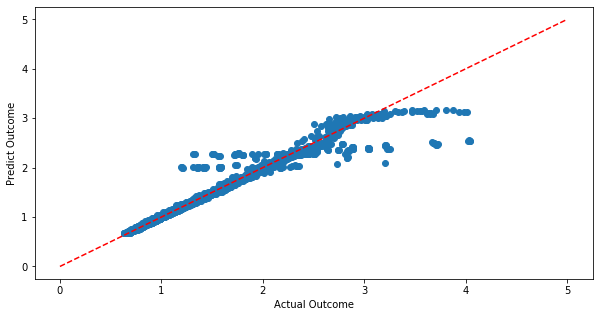

Validate:  0.01459460245182561


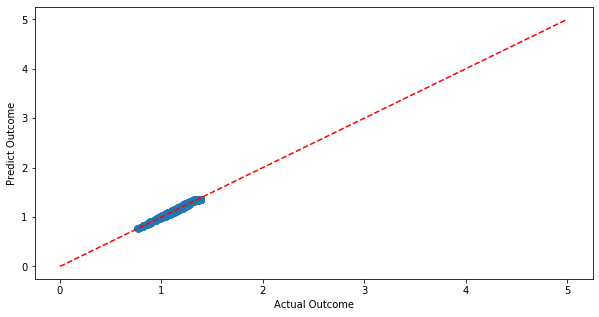

Test:  0.01406030196630313


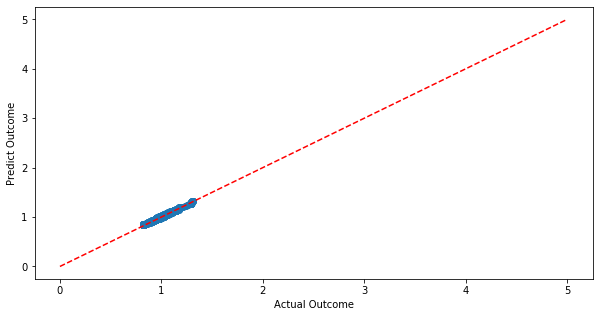

In [64]:
y_train_pred = model.predict(X_train)
y_val_pred = model.predict(X_val)
y_test_pred = model.predict(test[df_train_columns])

# Visualise
print('Train: ', get_rmse(y_train_pred, y_train))
plot_relation(y_train_pred, y_train, xlimit=0)

print('Validate: ', get_rmse(y_val_pred, y_val))
plot_relation(y_val_pred, y_val, xlimit=0)

print('Test: ', get_rmse(y_test_pred, test[target_var]))
plot_relation(y_test_pred, test[target_var], xlimit=0)

##### Visualise feature importance
Feature importance refers to techniques that assign a score to input features based on how useful they are at predicting a target variable. - [MLMastery](https://machinelearningmastery.com/calculate-feature-importance-with-python/#:~:text=Feature%20importance%20refers%20to%20techniques,at%20predicting%20a%20target%20variable)<br>
We want to get an intuition of which variables are helping predict our model, and so have the following chart to review.

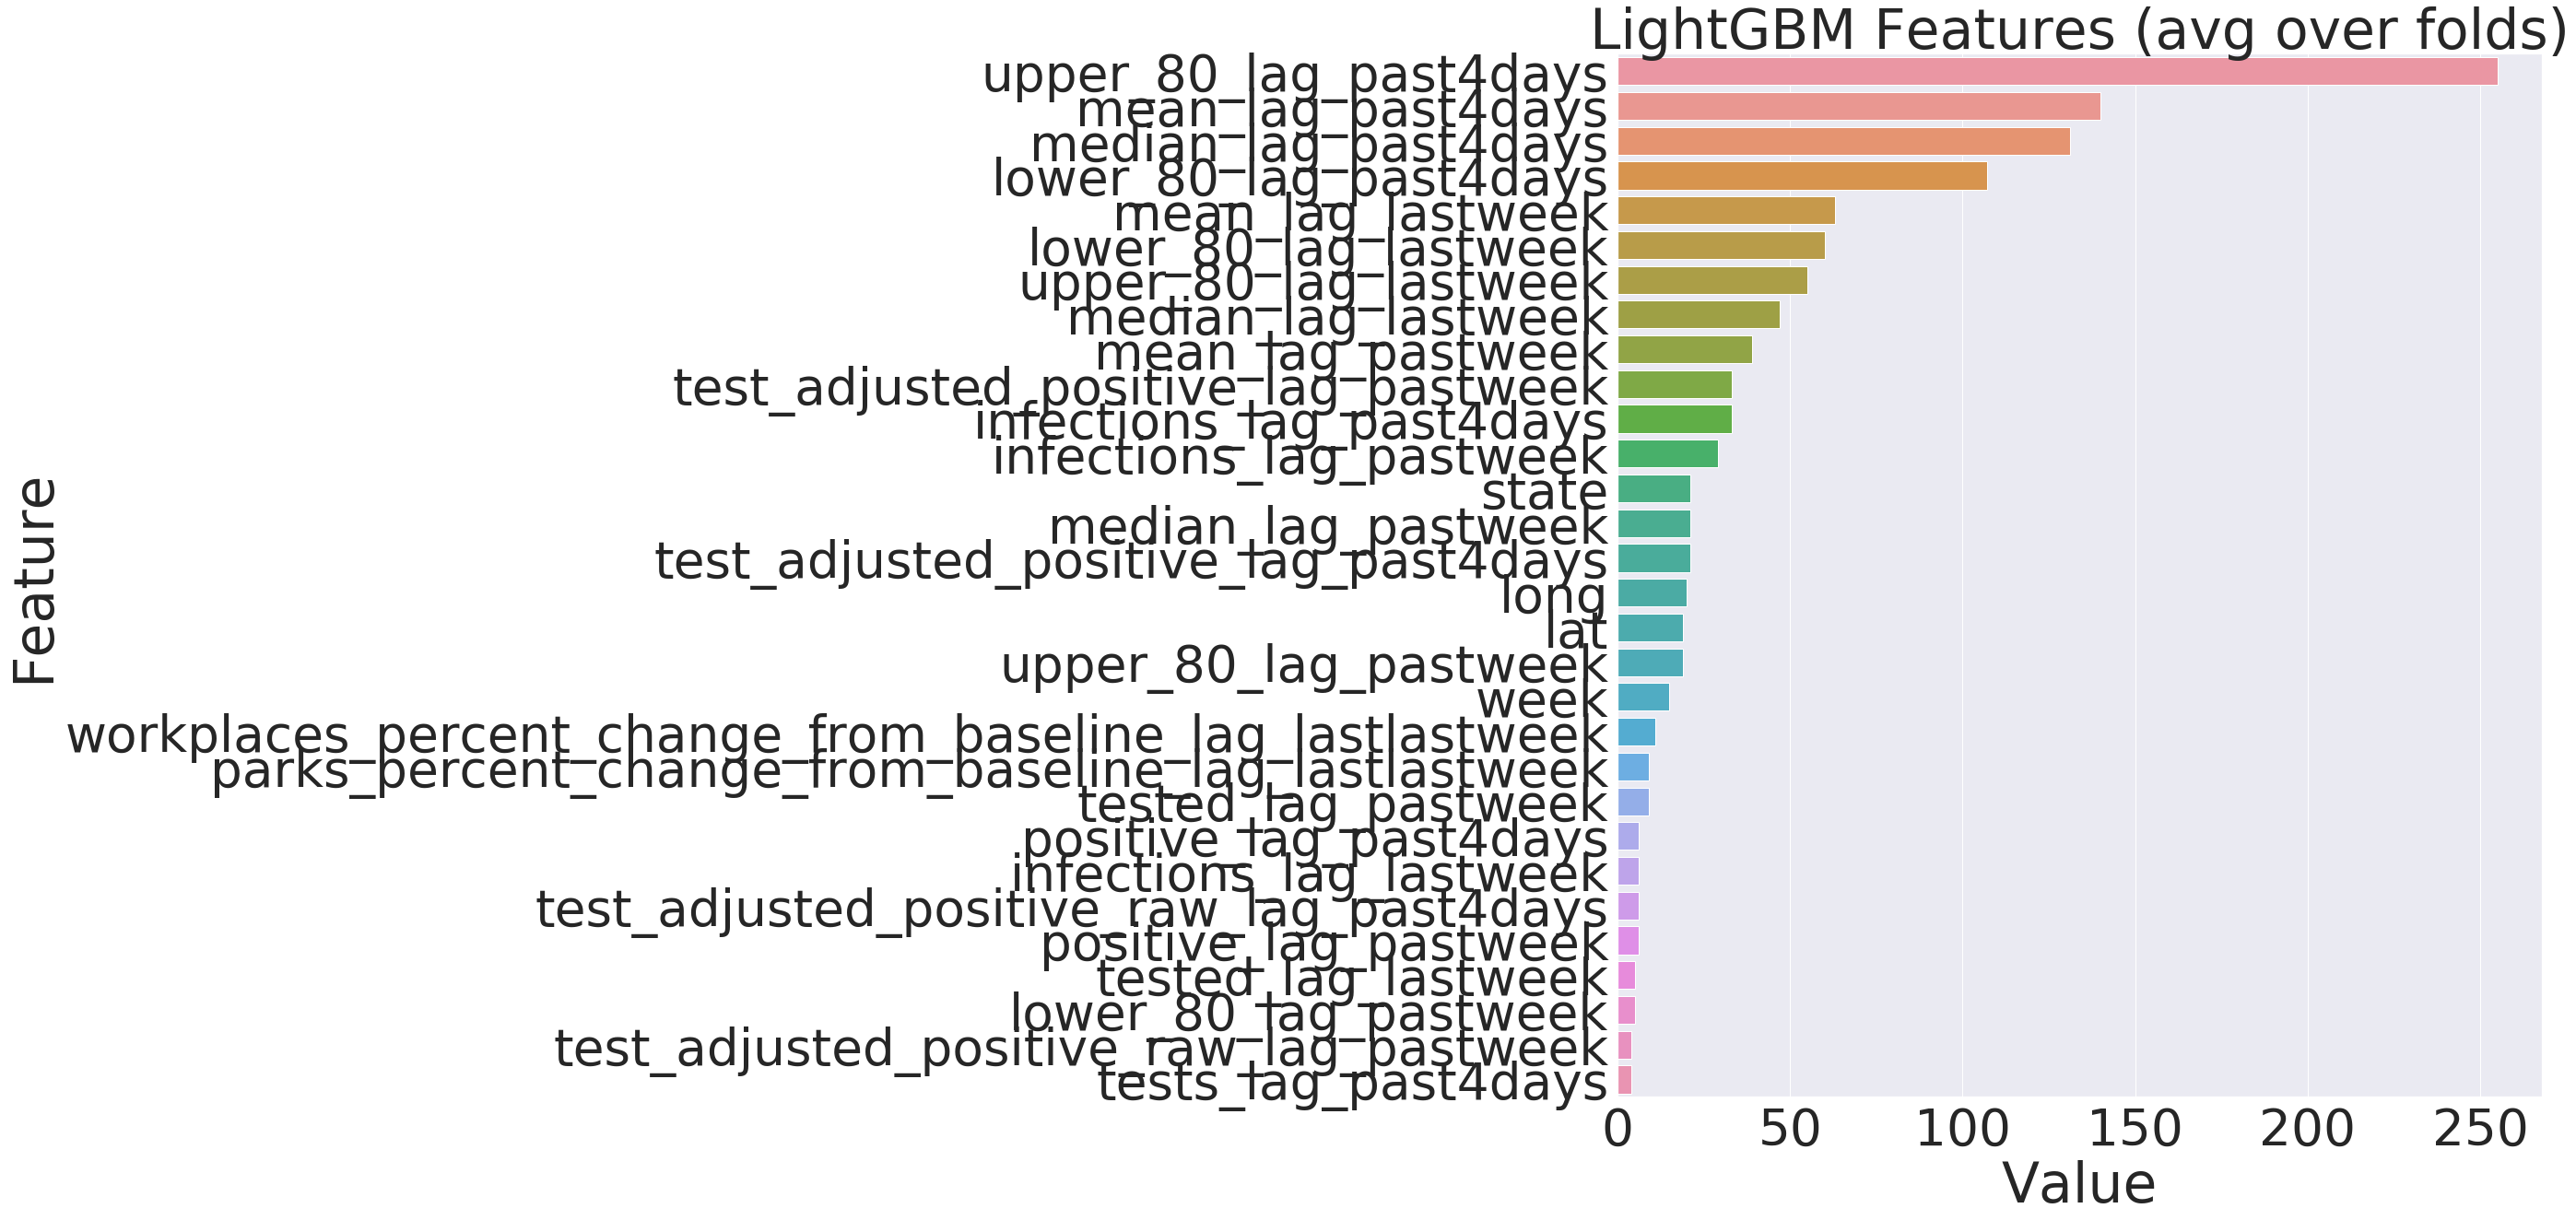

In [65]:
def plotImp(model, X , num = 20):
    feature_imp = pd.DataFrame({'Value':model.feature_importance(),'Feature':X.columns})
    plt.figure(figsize=(40, 20))
    sns.set(font_scale = 5)
    sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", 
                                                        ascending=False)[0:num])
    plt.title('LightGBM Features (avg over folds)')
    plt.tight_layout()
    plt.savefig('lgbm_importances-01.png')
    plt.show()
    
plotImp(model, X_train, num=30)

### 04viii. Export Data
The following section exports actual vs predicted variables by index columns for the purpose of plotting visualisations (E.g. on Tableau).

In [66]:
output_cols = index_cols

train_output = train[output_cols].copy()
train_output[target_var+'_actual'] = y_train
train_output[target_var+'_pred'] = y_train_pred
train_output['dataset_type'] = 'train'

val_output = val[output_cols].copy()
val_output[target_var+'_actual'] = y_val
val_output[target_var+'_pred'] = y_val_pred
val_output['dataset_type'] = 'validation'

test_output = test[output_cols].copy()
test_output[target_var+'_actual'] = test[target_var]
test_output[target_var+'_pred'] = y_test_pred
test_output['dataset_type'] = 'test'

final_output = pd.concat([pd.concat([train_output, val_output]),test_output]).reset_index(drop=True)



In [67]:
# if running locally
# final_output.to_csv('data/usa_pred_vs_actual.csv', index=False)

# if running in SageMaker notebook instance
final_output.to_csv('usa_pred_vs_actual.csv', index=False)

output_bucket = 'ml-social-good'
prefix = 'covid19-hackathon/data'

boto3.resource('s3').Bucket(output_bucket).Object(os.path.join(prefix, 'usa_pred_vs_actual.csv')).upload_file('usa_pred_vs_actual.csv')


## 05. Extensions
In the following section, we are exploring how far back we can lag data to still get a reasonable forecast. We hope to go as far back as possible, as that highlights the strength of our model to forecast far into the future.

In [68]:
def run_lgb_model(data, cat_var, num_var, target_var, date_variable, parameters,
                  validate_from = '2020-06-01', train_till = '2020-07-01', see_output = False):
    
    # Set up
    df_train_columns = cat_var + num_var
    for column in cat_var:
        data[column] =  data[column].astype('category')
    data[date_variable] = pd.to_datetime(data[date_variable])
    
    # Model Parameters


    # Train Test Split
    data[date_variable] = pd.to_datetime(data[date_variable])

    main_data = data[data[date_variable] < pd.to_datetime(train_till)].copy()
    test = data[data[date_variable] >= pd.to_datetime(train_till)].copy()

    train = main_data[main_data[date_variable] < pd.to_datetime(validate_from)].copy()
    val = main_data[main_data[date_variable] >= pd.to_datetime(validate_from)].copy()

    # Format data for Model
    X_train = train[df_train_columns]
    y_train = train[target_var]

    X_val = val[df_train_columns]
    y_val = val[target_var]
    
    # Create the LightGBM data containers
    lgb_train = lgb.Dataset(X_train, label=y_train, categorical_feature=cat_var)
    lgb_val = lgb.Dataset(X_val, label=y_val)

    # to record eval results for plotting
    evals_result = {} 

    # Train the model
    model = lgb.train(parameters,
                      lgb_train,
                      valid_sets=lgb_val,
                      num_boost_round=100,
                      evals_result=evals_result,
                      early_stopping_rounds=30,
                      verbose_eval = see_output)
    
    y_train_pred = model.predict(X_train)
    y_val_pred = model.predict(X_val)
    y_test_pred = model.predict(test[df_train_columns])

    # Visualise
    
    if see_output:
        print('Train: ', get_rmse(y_train_pred, y_train))
        plot_relation(y_train_pred, y_train, xlimit=0)

        print('Validate: ', get_rmse(y_val_pred, y_val))
        plot_relation(y_val_pred, y_val, xlimit=0)

        print('Test: ', get_rmse(y_test_pred, test[target_var]))
        plot_relation(y_test_pred, test[target_var], xlimit=0)
    
    return [get_rmse(y_train_pred, y_train), get_rmse(y_val_pred, y_val), get_rmse(y_test_pred, test[target_var])]

In [69]:
variations_df = pd.DataFrame()

for lag in range(0, 8):
    if lag == 0:
        num_var = [i for i in usa_merged_data.columns if ('lag_past' in i) or ('lag_last' in i)]
    else:
        num_var = [i for i in usa_merged_data.columns if ('_lag_'+str(lag)+'_past4days' in i) or ('lag_last' in i)]
    lag_row = run_lgb_model(data, cat_var, num_var, target_var, date_variable, parameters)
    variations_df = variations_df.append([lag_row])

variations_df = variations_df.reset_index(drop=True)
variations_df.columns = ['Train_RMSE', 'Val_RMSE', 'Test_RMSE']
variations_df

,Train_RMSE,Val_RMSE,Test_RMSE
0,0.117069,0.014071,0.013769
1,0.133403,0.020447,0.021411
2,0.153458,0.025986,0.031371
3,0.158051,0.036664,0.032868
4,0.180363,0.047993,0.046852
5,0.177545,0.055898,0.056835
6,0.221133,0.064573,0.071140
7,0.221133,0.064573,0.071140


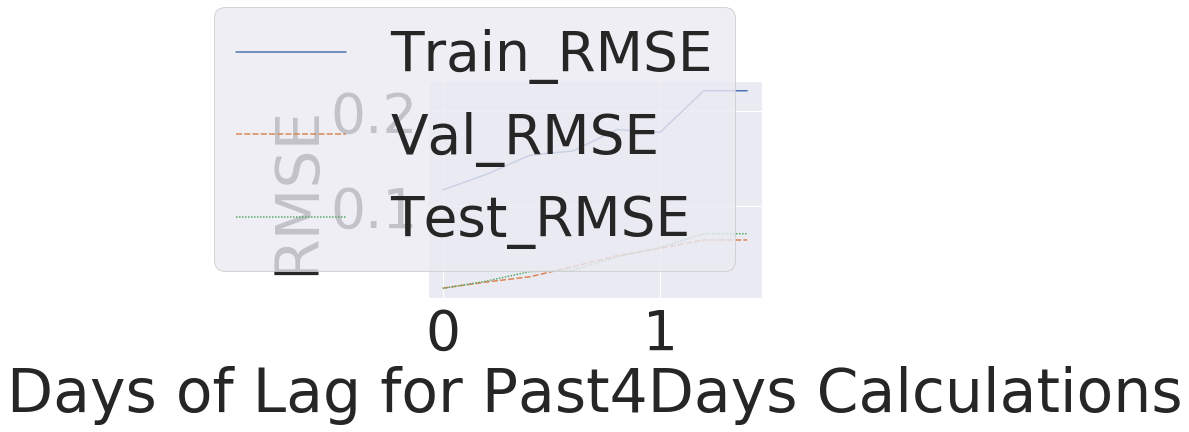

In [70]:
g = sns.lineplot(data=variations_df) 
g.set_xticklabels([i for i in range(-1,8)])
g.set(xlabel='Days of Lag for Past4Days Calculations', ylabel='RMSE')
plt.show()